<center><font size="6">Bank Churn Prediction</font></center>


## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install shap

# General-purpose utilities
import datetime  # Date and time handling.
import itertools  # Efficient looping, permutations, combinations.
import random  # Random number generation.
import warnings  # Warning control.
warnings.filterwarnings("ignore")  # Suppress warnings.

# Libraries for data handling
import numpy as np  # Numerical computations and arrays.
import pandas as pd  # Data manipulation and analysis.
from scipy import stats  # Statistical functions and tests.
import joblib  # Model saving and loading.
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF for multicollinearity.
from statsmodels.tools.tools import add_constant  # Add constant term for regression.
from sklearn.metrics import (  # Metrics for model evaluation.
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.preprocessing import StandardScaler  # Feature scaling.
from sklearn.model_selection import train_test_split  # Train-test split.

# Libraries for handling imbalanced data
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique.

# TensorFlow and Keras for deep learning
import tensorflow as tf  # TensorFlow core library.
from tensorflow import keras  # High-level neural networks API.
from tensorflow.keras.models import Sequential  # Sequential model building.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Layers for NN.
from tensorflow.keras.optimizers import Adam, RMSprop, SGD  # Optimizers for training.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard  # Callbacks for model training.
from tensorflow.keras.regularizers import l2  # Regularization for NN layers.
import time
import random
import os
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from imblearn.over_sampling import SMOTE

## Loading the dataset

In [ ]:
#import Google drive library and mount it
from google.colab import drive
drive.mount('/content/drive')

#path to the data
path="/content/drive/My Drive/AIMLTRAINING/collabdata/Churn.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
df = pd.read_csv(path)

# Check the top five records of the data
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Data Overview

In [ ]:
print(f"Shape of the data\n",df.shape)
print("-"*50+("\n"))
print("\nData Information:\n")
display(df.info())
print("Data types of the columns\n",df.dtypes)
print("-"*50+("\n"))
print("Missing values\n",df.isnull().sum())
print("-"*50+("\n"))
print("Number of duplicated rows\n",df.duplicated().sum())
print("-"*50+("\n"))
print("Basic statistics of the data\n")
df.describe().T

Shape of the data
 (10000, 14)
--------------------------------------------------


Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage:

None

Data types of the columns
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
--------------------------------------------------

Missing values
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
--------------------------------------------------

Number of duplicated rows
 0
--------------------------------------------------

Basic statistics of the data



count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

### Basic Data Observations

- The dataset consists of 10,000 rows and 14 columns, with no missing values.
- The data types include integers, floats, and objects, with columns such as `CreditScore` and `EstimatedSalary` being float64, and `Gender` and `Geography` being object types.
- There are no null values in any of the columns.
- The average credit score is 650.5, with a standard deviation of 96.65.
- The dataset is balanced between genders, and 51.5% of customers are active members.
- Customers' ages average 38.92 years, with a range from 18 to 92 years.
- The average tenure with the bank is 5.01 years, and 75% of customers have been with the bank for 7 years or less.
- The average account balance is \$76,485.89, with 25% of customers having a balance of \$0.
- The average estimated salary is \$100,090.20, ranging from \$11,580 to \$199,992.48.

**RowNumber**, **CustomerId**  and **Surname** are unlikely to have a significant impact on our analysis, so we will remove them from the data.

In [ ]:
#removing RowNumber from our data
df.drop(['RowNumber'], axis=1, inplace=True)

#removing CustomerId from our data
df.drop(['CustomerId'], axis=1, inplace=True)

#removing Surname from our data
df.drop(['Surname'], axis=1, inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

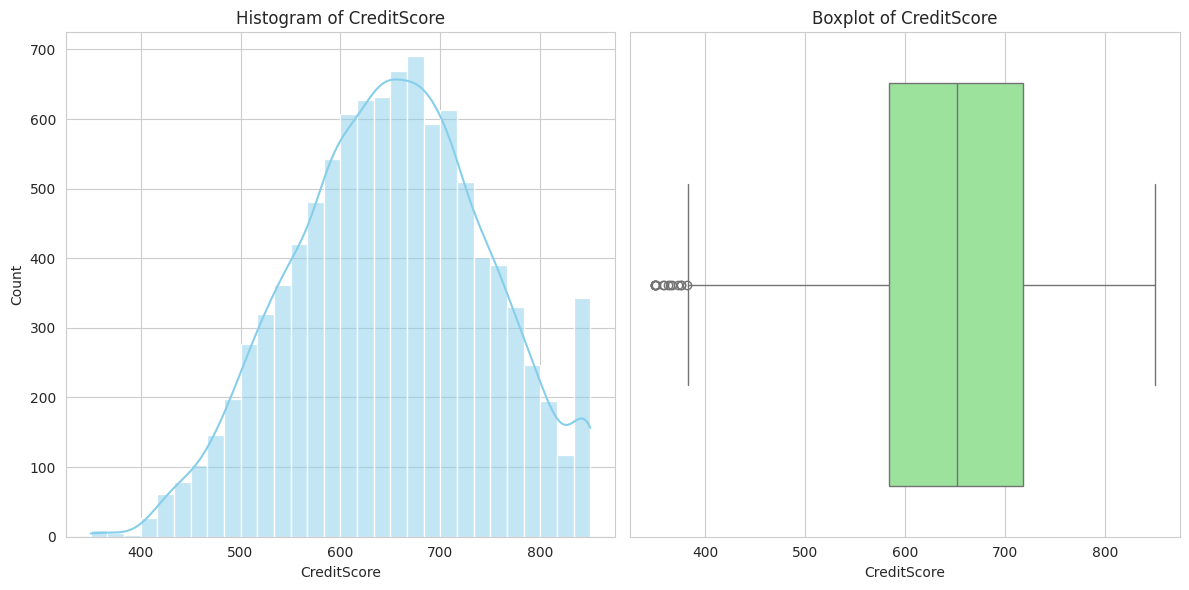

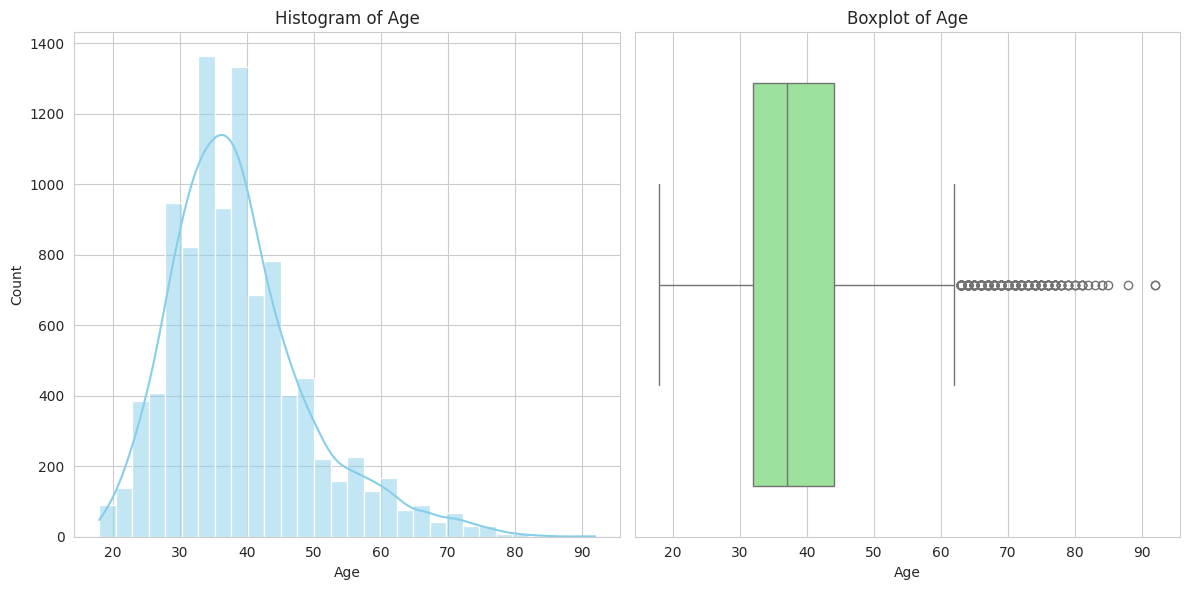

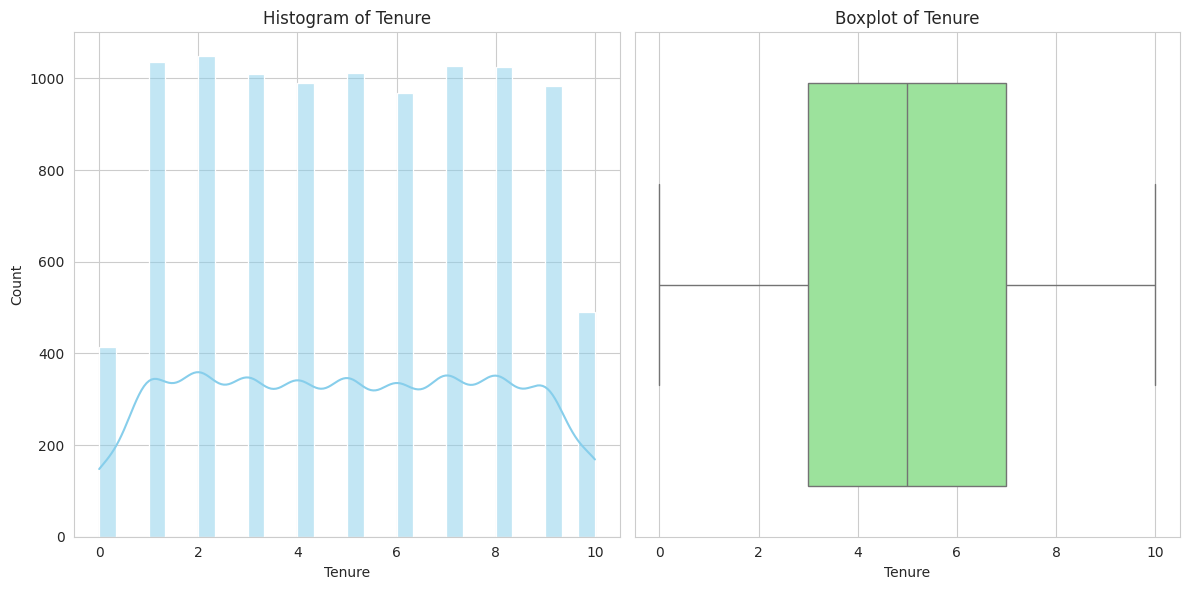

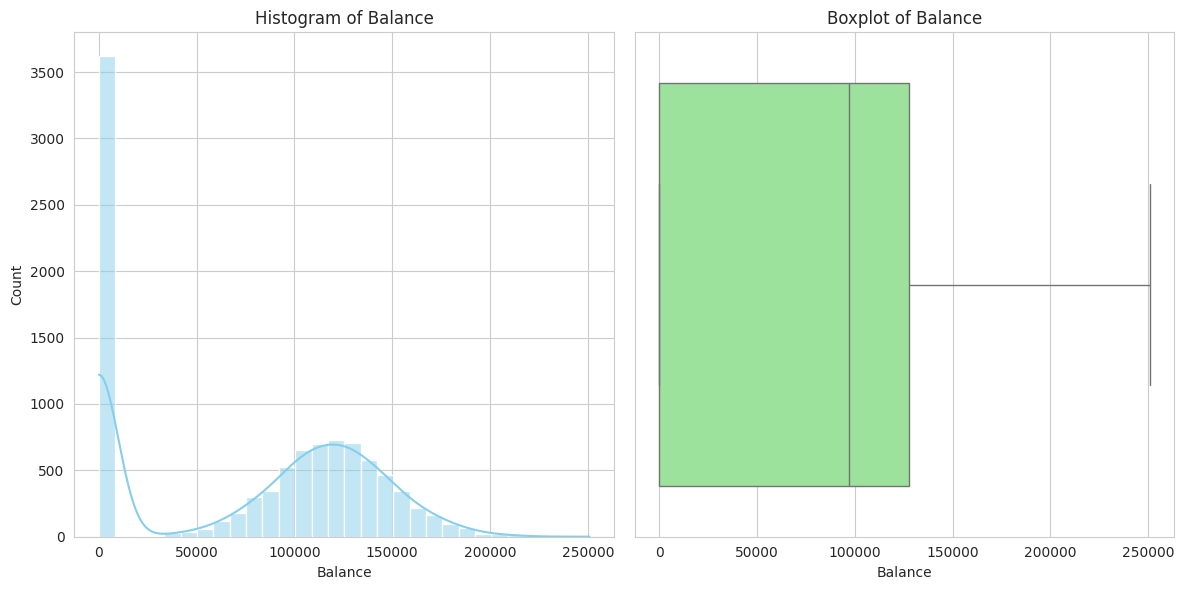

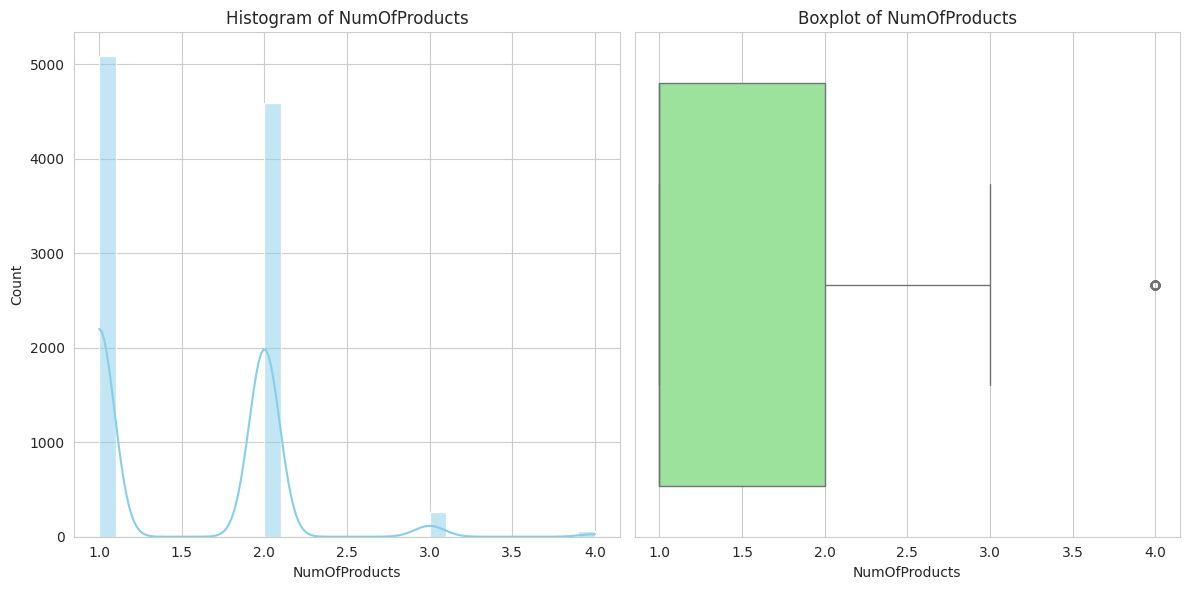

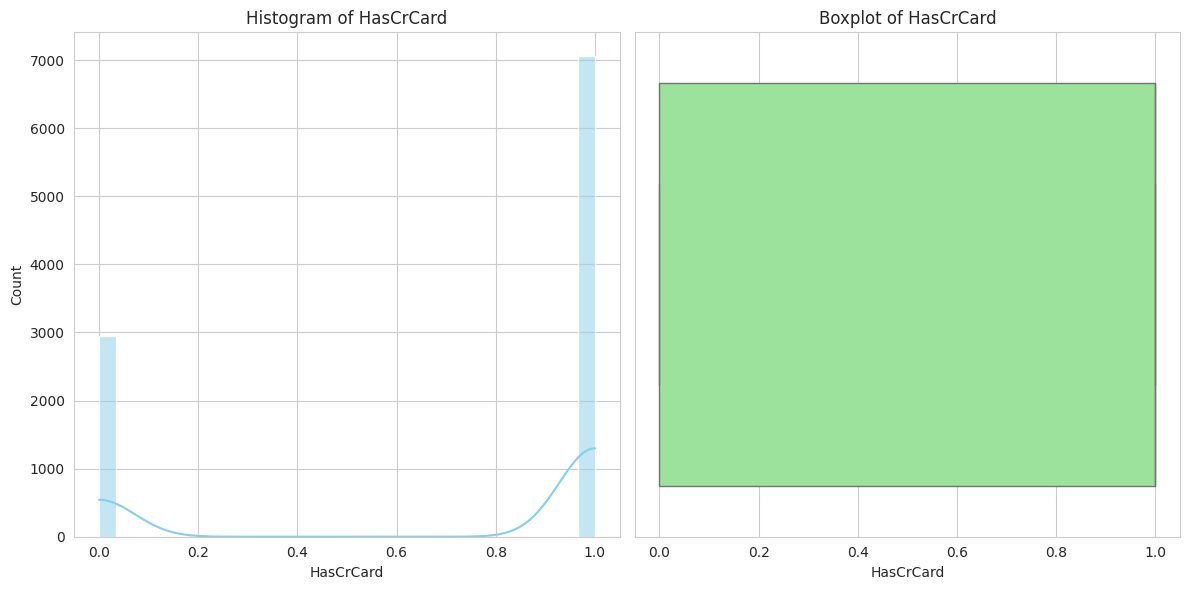

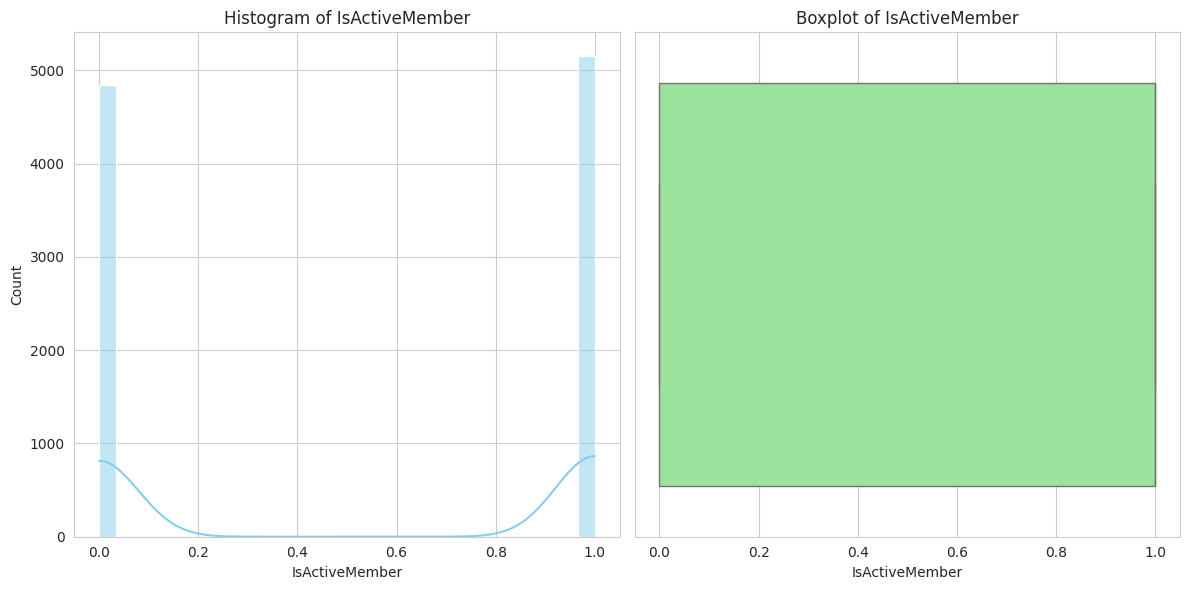

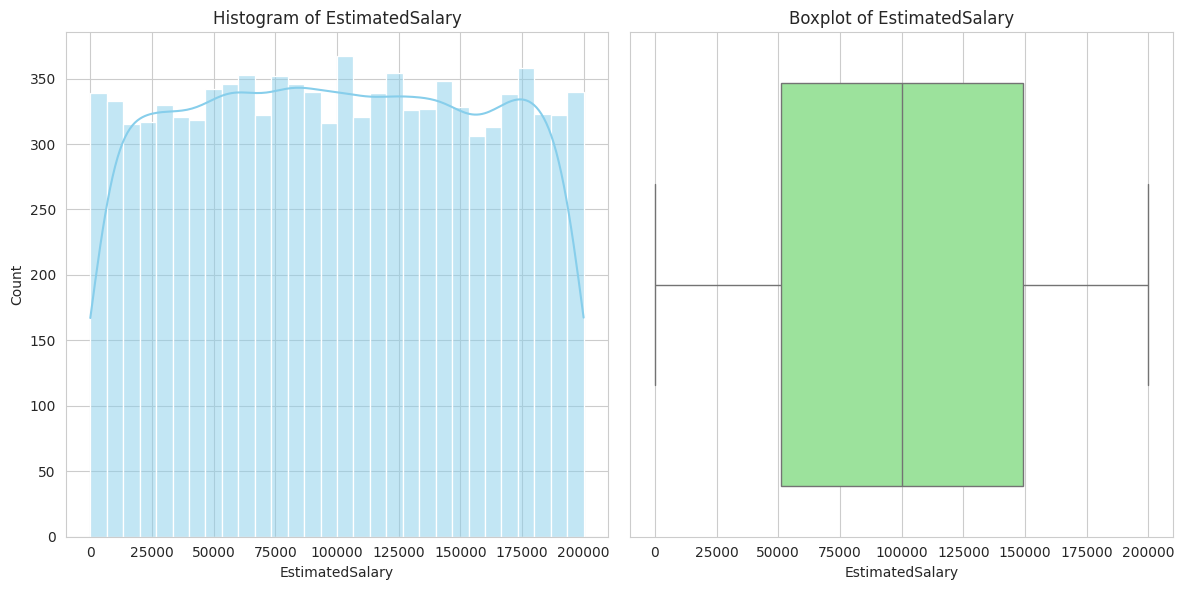

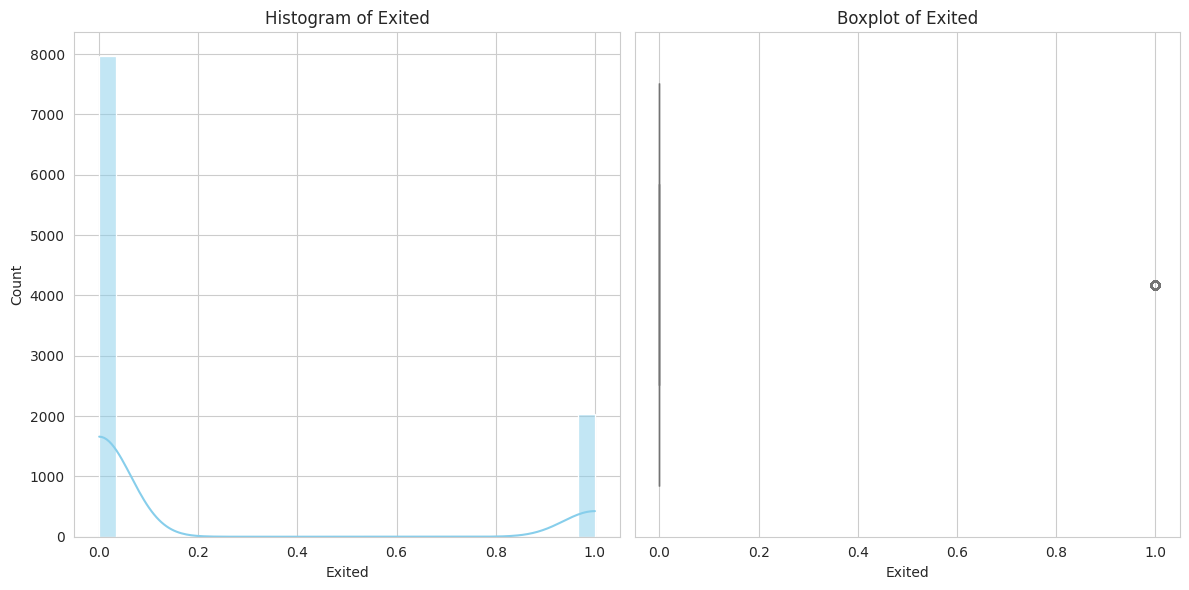

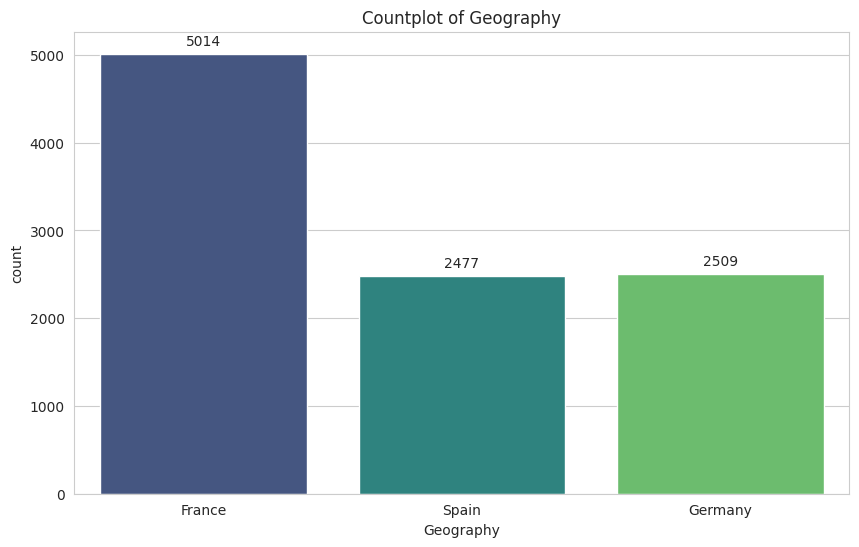

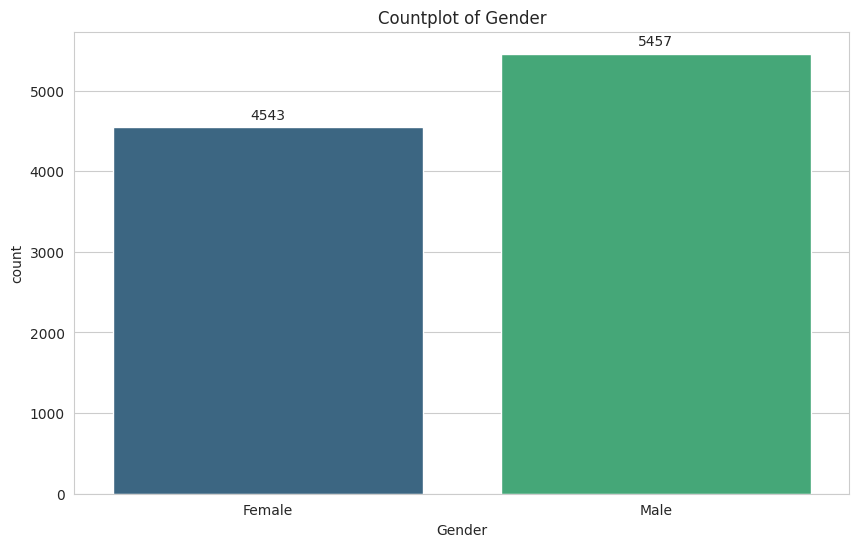

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Function to perform univariate analysis
def univariate_analysis(df):
    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Get the list of numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Univariate analysis for numerical columns
    for col in numerical_cols:
        # print(f'\n--- {col} ---')
        # print(df[col].describe())

        # Identify outliers using the IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count low and high outliers
        low_outliers = df[df[col] < lower_bound]
        high_outliers = df[df[col] > upper_bound]

        # print(f'Low outliers count: {len(low_outliers)}')
        # print(f'High outliers count: {len(high_outliers)}')

        # Plot histogram with KDE
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Plot boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

    # Univariate analysis for categorical columns
    for col in categorical_cols:
        # print(f'\n--- {col} ---')
        counts = df[col].value_counts()
        # print(counts)

        # Plotting based on the number of unique values
        plt.figure(figsize=(10, 6))

        if len(counts) <= 8:
            sns.countplot(x=df[col], palette='viridis')
            # Add counts on top of bars
            for p in plt.gca().patches:
                plt.gca().annotate(f'{p.get_height():.0f}',  # Changed 'd' to '.0f' to format as integer
                                  (p.get_x() + p.get_width() / 2., p.get_height()),
                                  ha='center', va='center',
                                  xytext=(0, 9),
                                  textcoords='offset points')
        else:
            sns.barplot(x=counts.index, y=counts.values, palette='viridis')
            plt.xticks(rotation=45)
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.title(f'Barplot of {col}')
            for i, value in enumerate(counts.values):
                plt.text(i, value, str(value), ha='center', va='bottom')

        plt.title(f'Countplot of {col}' if len(counts) <= 8 else f'Barplot of {col}')
        plt.show()

# Run the univariate analysis
univariate_analysis(df)


### **Univariate Analysis Data Overview**

**CreditScore**
- **Overview:** The average credit score is around 650 with a standard deviation of approximately 97.
- **Skewness:** The data appears to be fairly normally distributed with a range from 350 to 850.
- **Outliers:** There are 15 low outliers and no high outliers, indicating a few extremely low credit scores.

**Age**
- **Overview:** The average age of customers is around 39 years, with ages ranging from 18 to 92.
- **Skewness:** The data is slightly right-skewed, with older customers being less common.
- **Outliers:** There are 359 high outliers and no low outliers, likely due to very old ages compared to the majority.

**Tenure**
- **Overview:** The average tenure with the bank is about 5 years, with a range from 0 to 10 years.
- **Skewness:** The data is uniformly distributed with no significant skewness.
- **Outliers:** There are no outliers, indicating a consistent tenure distribution.

**Balance**
- **Overview:** The average balance is approximately \$76,486, with a wide range from $0 to nearly \$250,000.
- **Skewness:** The data is right-skewed, as many customers have a balance of zero.
- **Outliers:** There are no outliers, though the wide range in balances may still be notable.

**NumOfProducts**
- **Overview:** Most customers have either 1 or 2 products, with a maximum of 4 products.
- **Skewness:** The data is left-skewed, with a majority having fewer products.
- **Outliers:** There are 60 high outliers and no low outliers, likely customers with the maximum number of products.

**HasCrCard**
- **Overview:** Approximately 71% of customers have a credit card.
- **Skewness:** The data is binary and fairly evenly distributed.
- **Outliers:** There are no outliers, as this is a categorical variable.

**IsActiveMember**
- **Overview:** About 52% of customers are active members of the bank.
- **Skewness:** The data is binary and evenly distributed.
- **Outliers:** There are no outliers, as this is a categorical variable.

**EstimatedSalary**
- **Overview:** The average estimated salary is about \$100,090, with a range from $11.58 to nearly \$200,000.
- **Skewness:** The data is uniformly distributed, with no significant skewness.
- **Outliers:** There are no outliers, indicating a consistent salary distribution.

**Exited**
- **Overview:** About 20% of the customers have exited the bank.
- **Skewness:** The data is binary and heavily skewed towards non-exiters.
- **Outliers:** There are 2,037 high outliers, which correspond to customers who exited.

**Geography**
- **Overview:** The majority of customers are from France, followed by Germany and Spain.
- **Skewness:** The data is skewed towards French customers, with fewer from Germany and Spain.
- **Outliers:** There are no outliers, as this is a categorical variable.

**Gender**
- **Overview:** The dataset is relatively balanced, with 55% male and 45% female customers.
- **Skewness:** The data is slightly skewed towards male customers.
- **Outliers:** There are no outliers, as this is a categorical variable.

### Bivariate Analysis

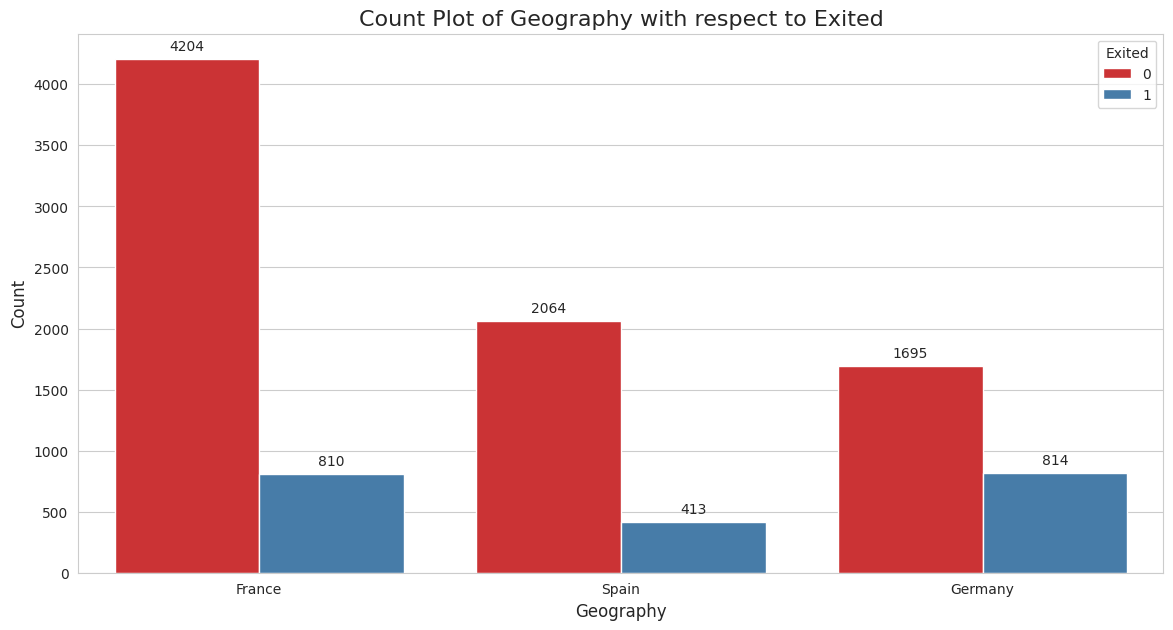

<Figure size 1600x600 with 0 Axes>

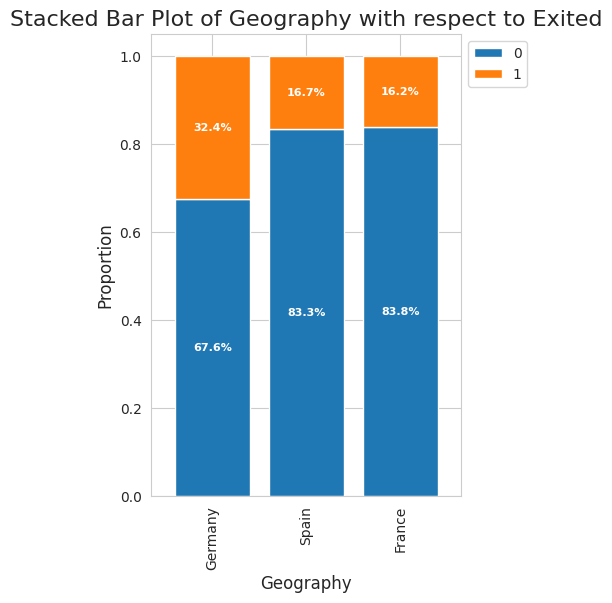

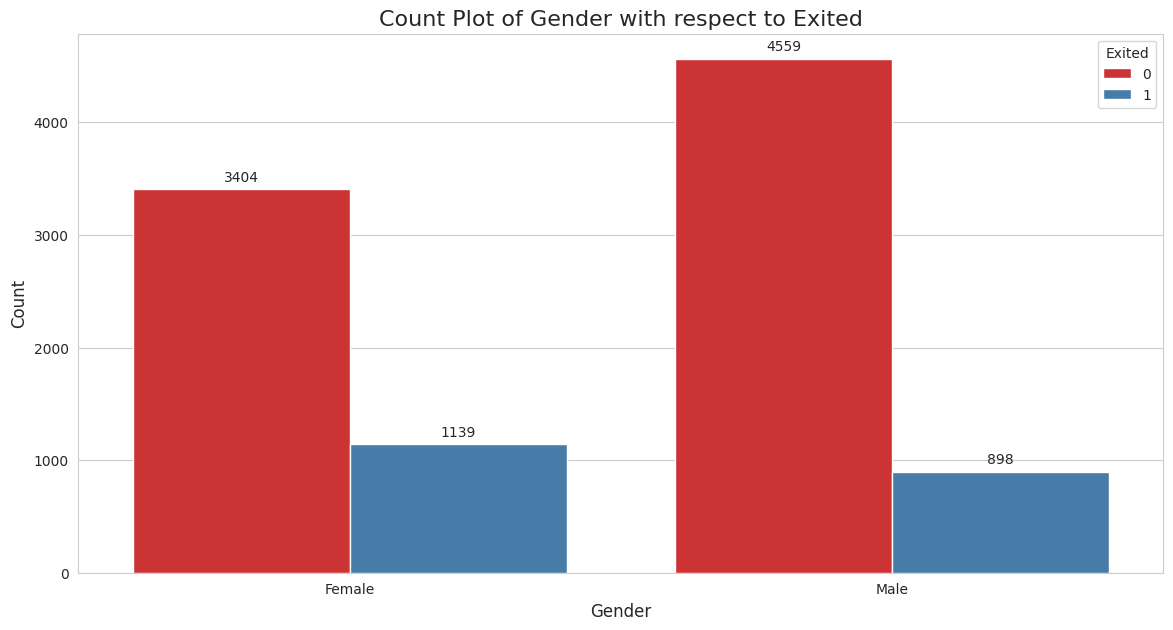

<Figure size 1600x600 with 0 Axes>

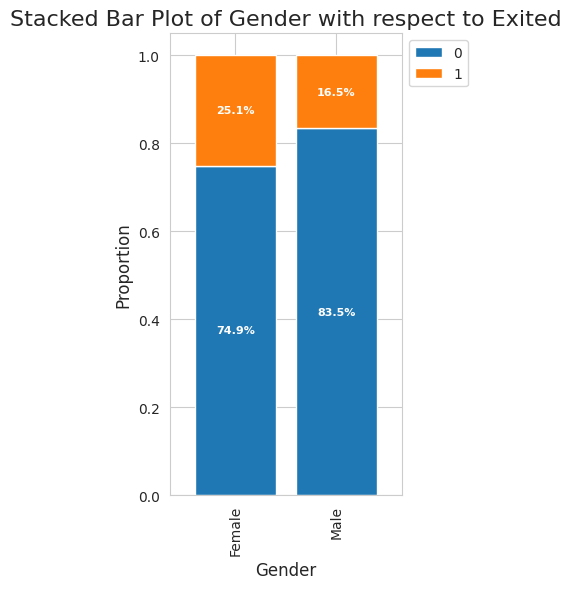

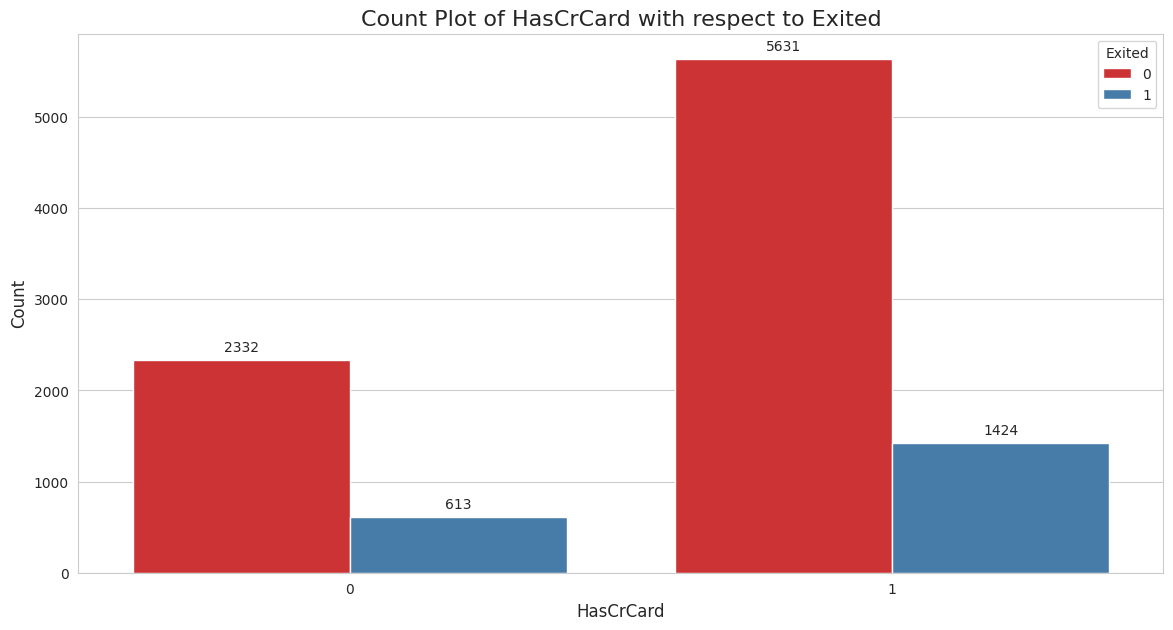

<Figure size 1600x600 with 0 Axes>

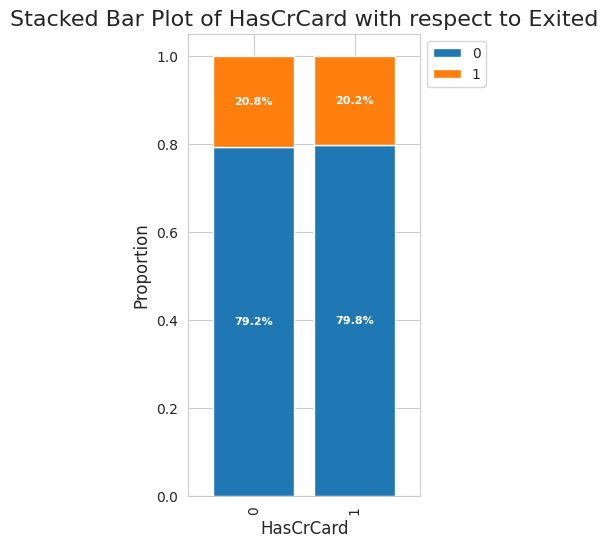

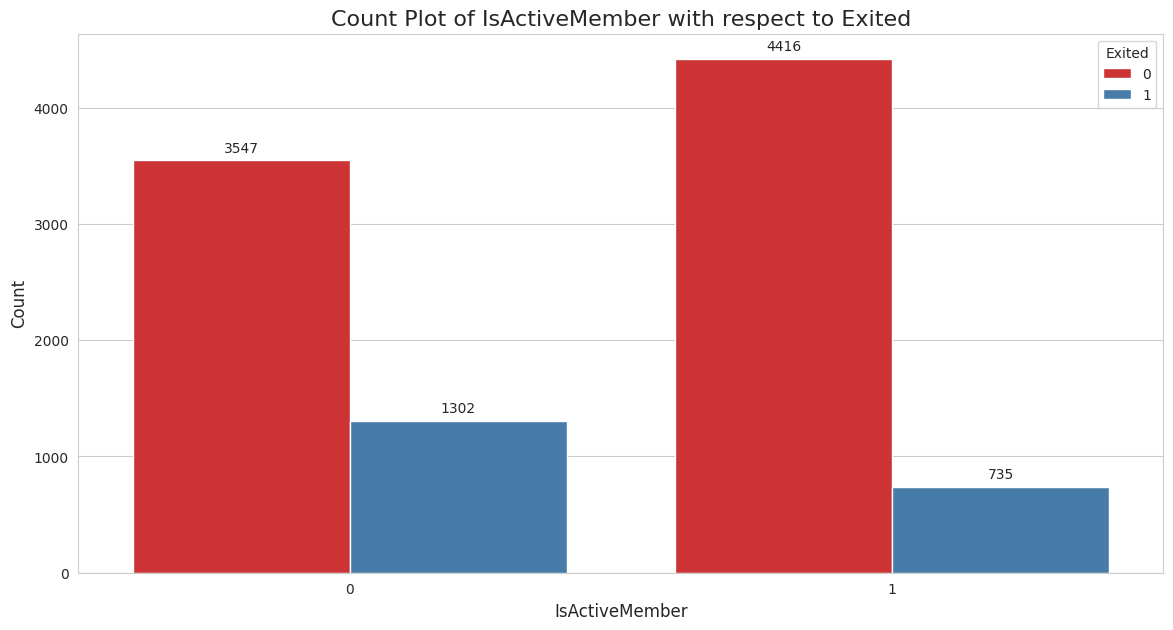

<Figure size 1600x600 with 0 Axes>

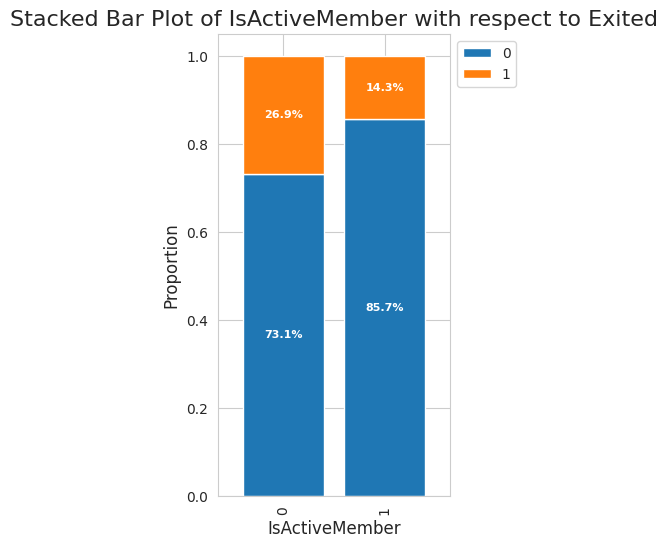

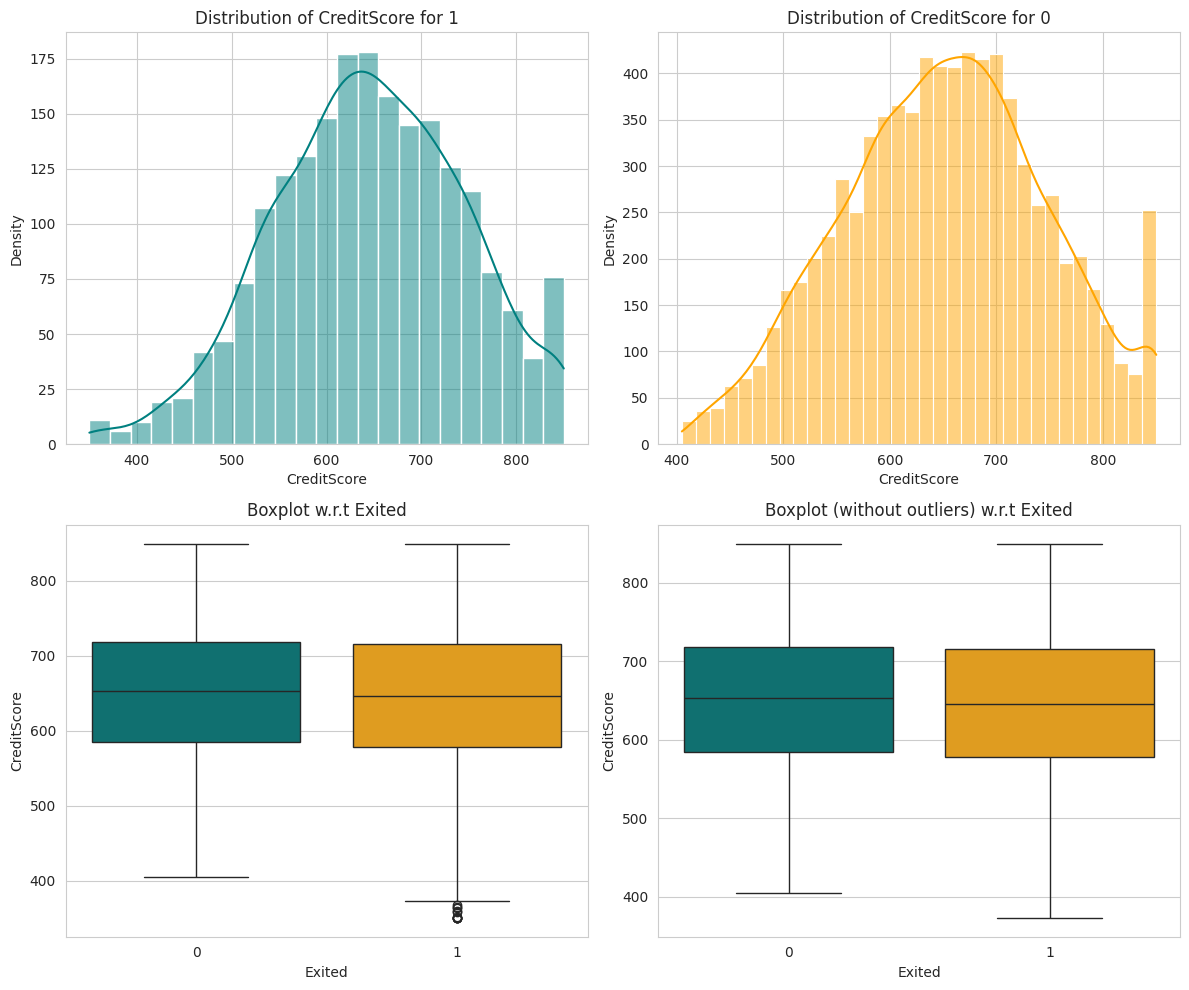

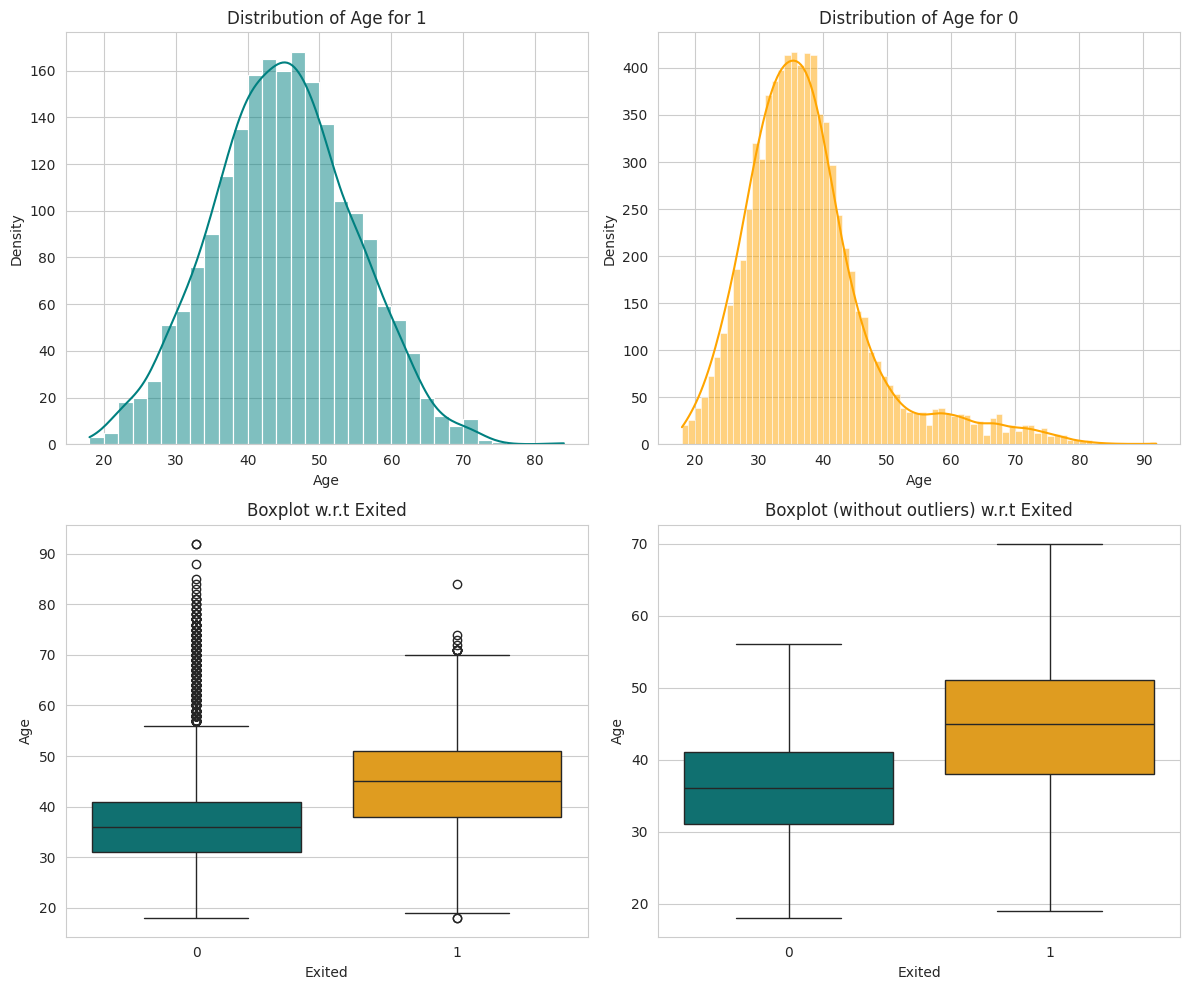

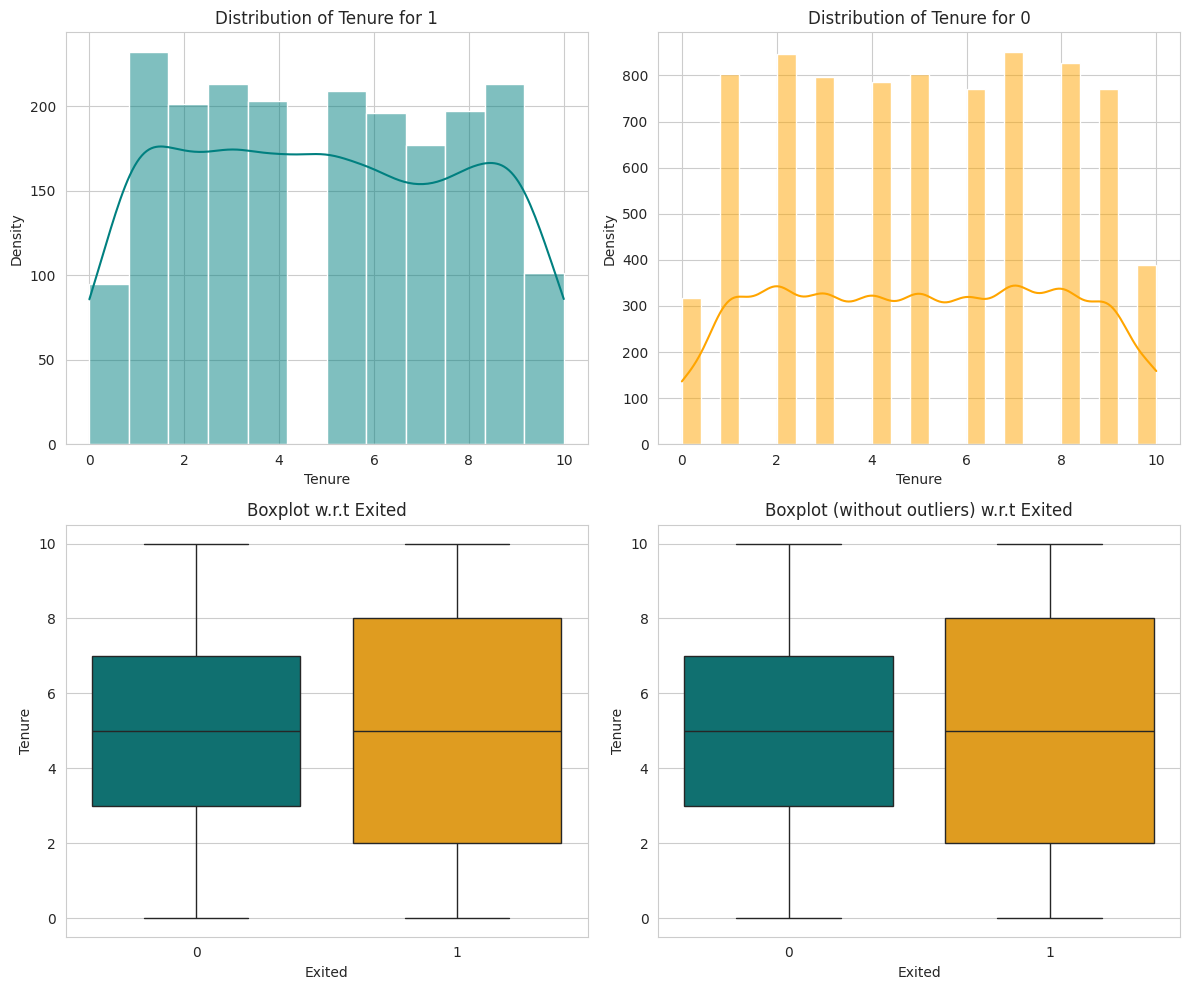

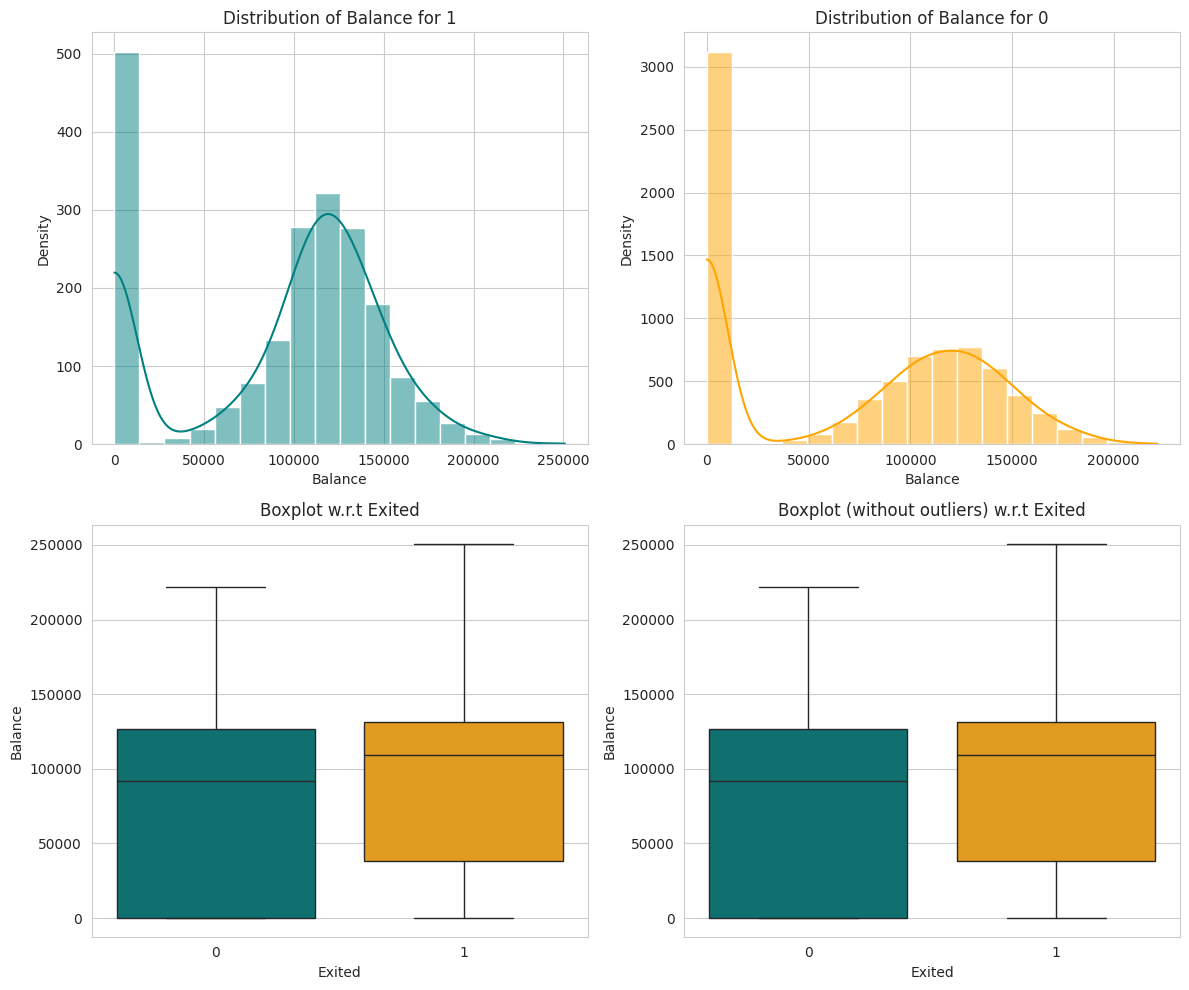

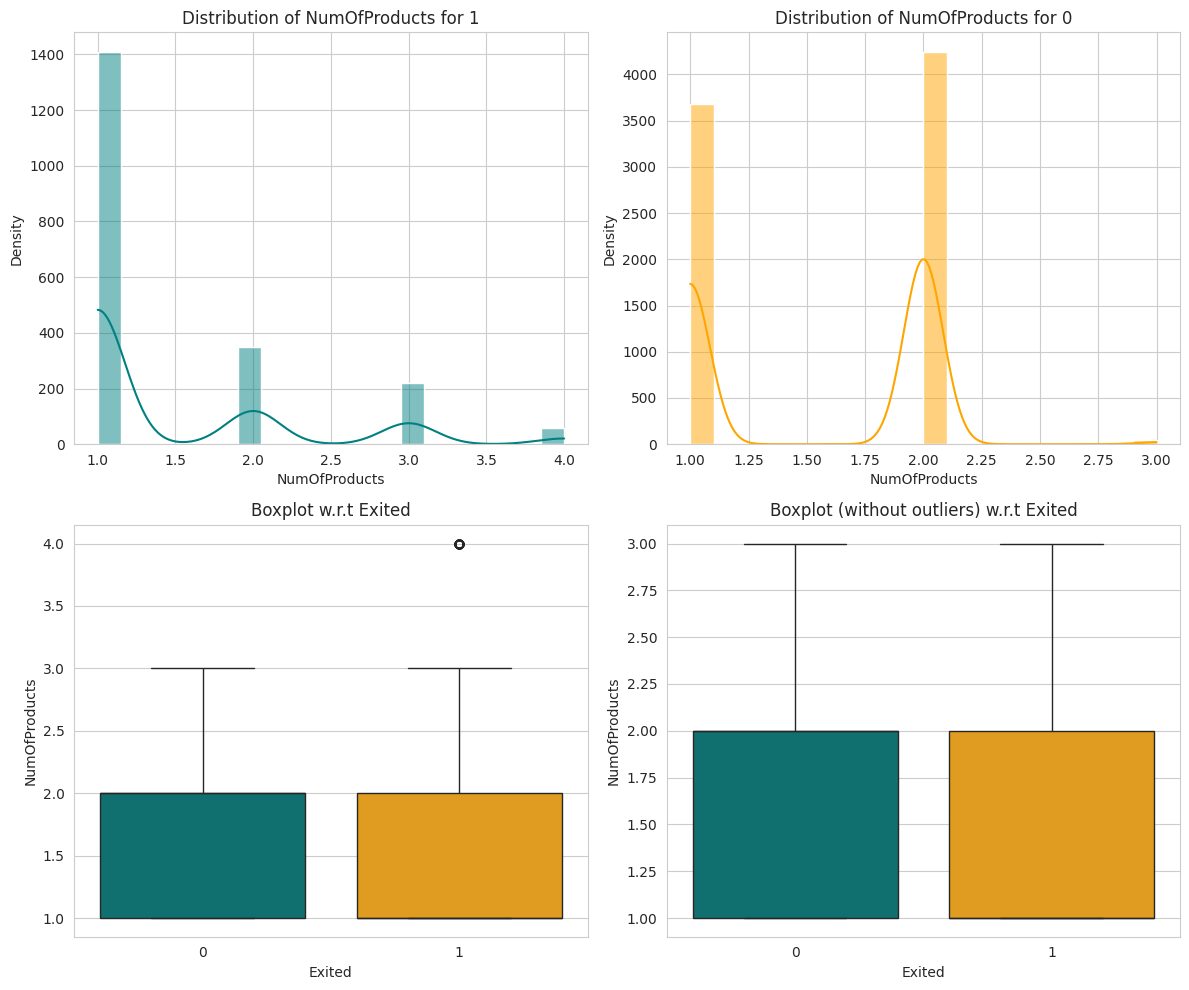

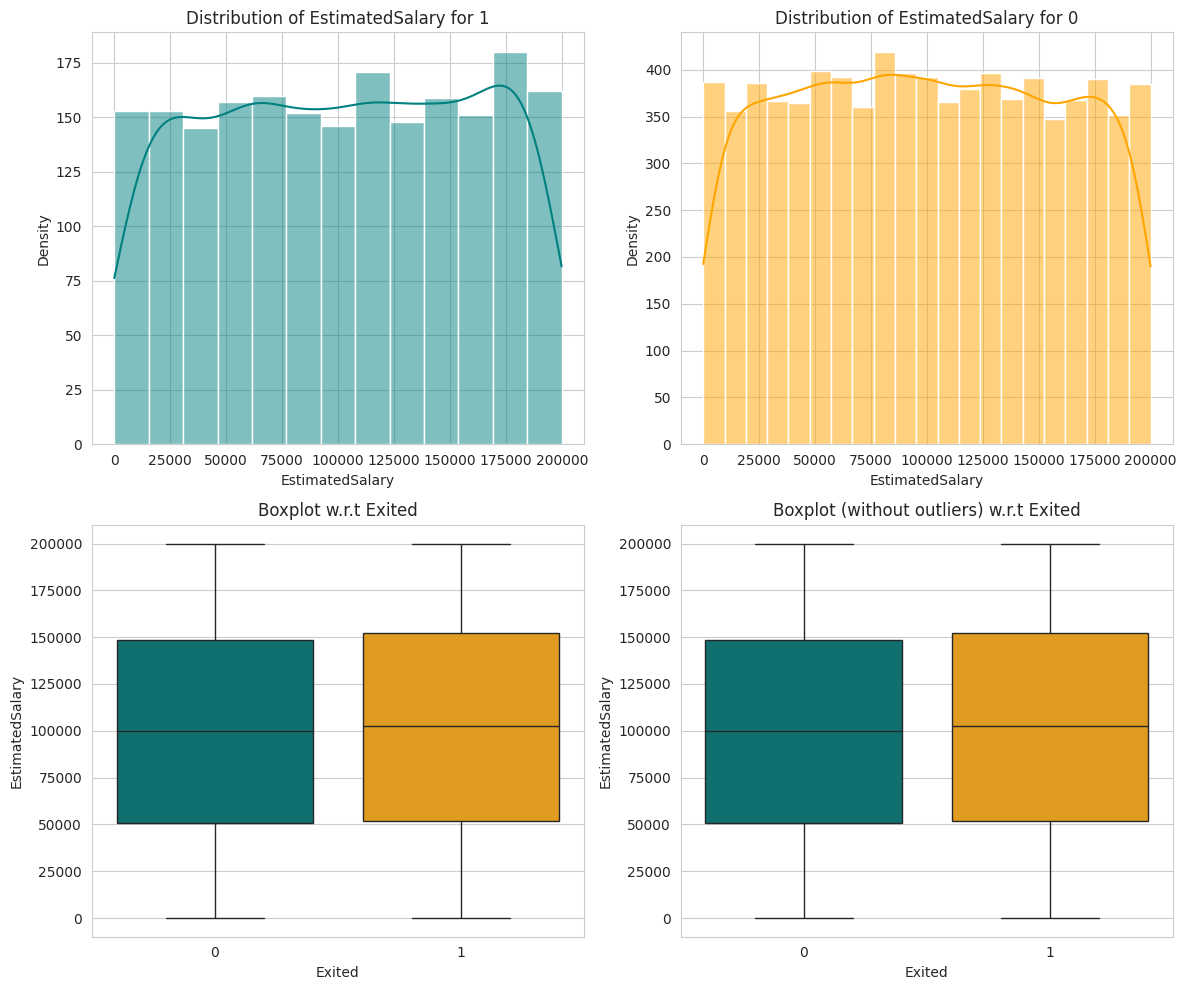

In [ ]:
def categorical_predictors_vs_target(data, predictor, target):
    """
    Analyze categorical predictor with respect to the target variable

    data: dataframe
    predictor: categorical predictor variable
    target: target variable
    """
    # print(f"--- Analysis for {predictor} with respect to {target} ---\n")

    # Descriptive Statistics
    descriptive_stats = data[[predictor, target]].groupby([predictor, target]).size().unstack(fill_value=0)
    # print(descriptive_stats)

    # Bar plot
    plt.figure(figsize=(14, 7))
    sns.countplot(data=data, x=predictor, hue=target, palette='Set1')  # Using 'Set1' palette for clarity
    plt.title(f'Count Plot of {predictor} with respect to {target}', fontsize=16)
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Add counts on top of the bars
    for p in plt.gca().patches:
        count = int(p.get_height())
        if count > 0:  # Only annotate bars with counts greater than 0
            plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    plt.show()

    print("\n\n")

    # Stacked bar plot with percentages
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

    # Print the data summary of the stacked plot
    # print("Categorical Summary with Percentages:\n")
    tab_percentages = tab * 100
    tab_percentages['Total'] = tab_percentages.sum(axis=1)
    # print(tab_percentages)

    # Increase bar width for the stacked plot
    plt.figure(figsize=(16, 6))  # Set figsize for stacked plot
    ax = tab.plot(kind='bar', stacked=True, figsize=(count + 1, 6), width=0.8)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot of {predictor} with respect to {target}', fontsize=16)
    plt.xlabel(predictor, fontsize=12)
    plt.ylabel("Proportion", fontsize=12)

    # Add percentages to the bars with adjusted font size
    for bars in ax.containers:
        ax.bar_label(bars, labels=[f'{h*100:.1f}%' for h in bars.datavalues], label_type='center', color='white', weight='bold', fontsize=8)

    plt.subplots_adjust(hspace=0.4)  # Add space between the two graphs
    plt.show()


def numerical_predictor_vs_target(data, predictor, target):
    """
    Analyze the distribution of a numerical predictor with respect to the target variable.

    data: DataFrame
    predictor: str - name of the numerical predictor variable
    target: str - name of the target variable
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # Print summary statistics including outliers
    for unique_value in target_uniq:
        subset = data[data[target] == unique_value]
        count = subset[predictor].count()
        mean = subset[predictor].mean()
        std = subset[predictor].std()
        min_val = subset[predictor].min()
        max_val = subset[predictor].max()
        median = subset[predictor].median()
        skewness = subset[predictor].skew()

        # Outlier detection using IQR method
        Q1 = subset[predictor].quantile(0.25)
        Q3 = subset[predictor].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_condition = (subset[predictor] < lower_bound) | (subset[predictor] > upper_bound)
        outlier_count = subset[outlier_condition][predictor].count()

        # print(f"--- Summary for {predictor} vs {target}={unique_value} ---")
        # print(f"Count: {count}, Mean: {mean:.2f}, Std: {std:.2f}, Min: {min_val:.2f}, Max: {max_val:.2f}, Median: {median:.2f}, Skewness: {skewness:.2f}, Outliers: {outlier_count}\n")

    # Overall summary statistics
    overall_count = data[predictor].count()
    overall_mean = data[predictor].mean()
    overall_std = data[predictor].std()
    overall_min = data[predictor].min()
    overall_max = data[predictor].max()
    overall_median = data[predictor].median()
    overall_Q1 = data[predictor].quantile(0.25)
    overall_Q3 = data[predictor].quantile(0.75)
    overall_IQR = overall_Q3 - overall_Q1
    overall_skewness = data[predictor].skew()

    overall_lower_bound = overall_Q1 - 1.5 * overall_IQR
    overall_upper_bound = overall_Q3 + 1.5 * overall_IQR

    overall_outlier_condition = (data[predictor] < overall_lower_bound) | (data[predictor] > overall_upper_bound)
    total_outliers = data[overall_outlier_condition][predictor].count()

    # print(f"Overall Summary for {predictor}:")
    # print(f"Count: {overall_count}, Mean: {overall_mean:.2f}, Std: {overall_std:.2f}, Min: {overall_min:.2f}, Max: {overall_max:.2f}, Median: {overall_median:.2f}, Skewness: {overall_skewness:.2f}, Outliers: {total_outliers}\n")

    # Histogram for both target categories
    axs[0, 0].set_title("Distribution of " + predictor + " for " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )
    axs[0, 0].set_xlabel(predictor)
    axs[0, 0].set_ylabel("Density")

    axs[0, 1].set_title("Distribution of " + predictor + " for " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )
    axs[0, 1].set_xlabel(predictor)
    axs[0, 1].set_ylabel("Density")

    # Boxplot for both categories
    axs[1, 0].set_title("Boxplot w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette={"0": "teal", "1": "orange"})
    axs[1, 0].set_xlabel(target)
    axs[1, 0].set_ylabel(predictor)

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette={"0": "teal", "1": "orange"},
    )
    axs[1, 1].set_xlabel(target)
    axs[1, 1].set_ylabel(predictor)

    plt.tight_layout()
    plt.show()

# Load your data
# df = pd.read_csv('your_data_file.csv')  # Replace with your actual file path

# Define categorical and numerical columns
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
target = 'Exited'

# Apply the functions for all combinations
for cat_col in categorical_columns:
    categorical_predictors_vs_target(df, cat_col, target)

for num_col in numerical_columns:
    numerical_predictor_vs_target(df, num_col, target)


### Bivariate Analysis: Predictor vs. Target Variables
### Geography vs. Exited
- **France:** 16.15% of customers left, while 83.85% stayed.
- **Germany:** 32.44% of customers left, compared to 67.56% who stayed.
- **Spain:** 16.67% of customers left, with 83.33% staying.
- **Overall Insight**: Customers in Germany have the highest exit rate among the three countries, while those in Spain and France exhibit similar and lower exit rates.

### Gender vs. Exited
- **Female:** 25.07% of females left the bank.
- **Male:** 16.46% of males left the bank.
- Females are more likely to leave the bank compared to males, with an exit rate of 25.07% versus 16.46%. This suggests that gender may be a significant factor influencing customer churn and should be considered in the model.

### HasCrCard vs. Exited
- **No Credit Card:** 20.81% of customers with no credit card left.
- **With Credit Card:** 20.18% of customers with a credit card left.
- The proportion of customers leaving is similar regardless of credit card possession.

### IsActiveMember vs. Exited
- **Inactive Members:** 26.85% of inactive members left.
- **Active Members:** 14.27% of active members left.
- Inactive members are more likely to leave compared to active members.

### CreditScore vs. Exited
- **Basic Statistics**: Exiting customers have an average Credit Score of 645.35 (range: 350-850), while non-exiting customers average 651.85 (range: 300-850).
- **Skewness**: The distribution for exiting customers is slightly left-skewed (-0.14), indicating more lower Credit Scores, whereas the non-exiting group is nearly symmetric (-0.05).
- **Outliers**: There are 11 outliers among exiting customers and none among non-exiting customers.
- **Comparison**: The average Credit Score is slightly lower for exiting customers (645.35) compared to non-exiting customers (651.85).

### Age vs. Exited
- **Basic Statistics**: Exiting customers have an average age of 44.84 years (range: 18-70), while non-exiting customers average 37.41 years (range: 18-65).
- **Skewness**: The age distribution is nearly symmetrical for exiting customers (skewness of 0.08), but right-skewed for non-exiting customers (skewness of 1.38), likely due to a higher number of younger individuals.
- **Outliers**: There are 13 outliers among exiting customers and 486 among non-exiting customers.
- **Comparison**: Exiting customers are generally older (average age of 44.84) compared to non-exiting customers (average age of 37.41).

### Tenure vs. Exited
- **Basic Statistics**: Exiting customers have an average tenure of 4.93 years (range: 0-10), while non-exiting customers average 5.03 years (range: 0-10).
- **Skewness**: The tenure distribution is nearly symmetric for exiting customers (skewness of 0.05) and perfectly symmetric for non-exiting customers (skewness of 0.00).
- **Outliers**: No outliers are present in either group.
- **Comparison**: Non-exiting customers have a slightly higher average tenure (5.03 years) compared to exiting customers (4.93 years).

### Balance vs. Exited
- **Basic Statistics**: Exiting customers have an average balance of 91,108.54 (range: 0-250,000), while non-exiting customers average 72,745.30 (range: 0-200,000).
- **Skewness**: The distribution is slightly left-skewed for exiting customers (-0.51), possibly due to a few high balances, whereas it is nearly symmetric for non-exiting customers (-0.05).
- **Outliers**: No outliers are present in either group.
- **Comparison**: Exiting customers generally have a higher average balance (91,108.54) compared to non-exiting customers (72,745.30).

### NumOfProducts vs. Exited
- **Basic Statistics**: Exiting customers have an average of 1.48 products (range: 1-4), while non-exiting customers average 1.54 products (range: 1-4).
- **Skewness**: The distribution is right-skewed for exiting customers (skewness of 1.57), potentially due to a few with more products, while it is nearly symmetric for non-exiting customers (skewness of -0.05).
- **Outliers**: There are 60 outliers among exiting customers, with none in the non-exiting group.
- **Comparison**: Non-exiting customers have a slightly higher average number of products (1.54) compared to exiting customers (1.48).

### EstimatedSalary vs. Exited
- **Basic Statistics**: Exiting customers have an average estimated salary of 101,465.68 (range: 30,000-200,000), while non-exiting customers average 99,738.39 (range: 30,000-200,000).
- **Skewness**: Both groups have nearly symmetric distributions (exiting: -0.03; non-exiting: 0.01).
- **Outliers**: No outliers are present in either group.
- **Comparison**: Exiting customers have a slightly higher average estimated salary (101,465.68) compared to non-exiting customers (99,738.39).

### Continued Bivariate Analysis: Numerical Vs Numerical Variables

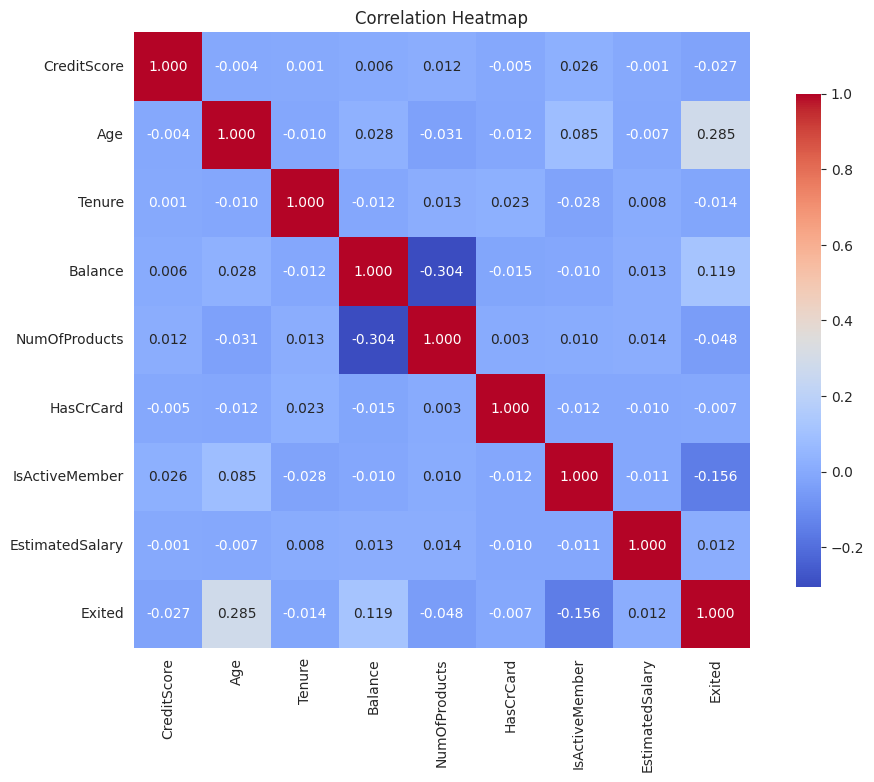

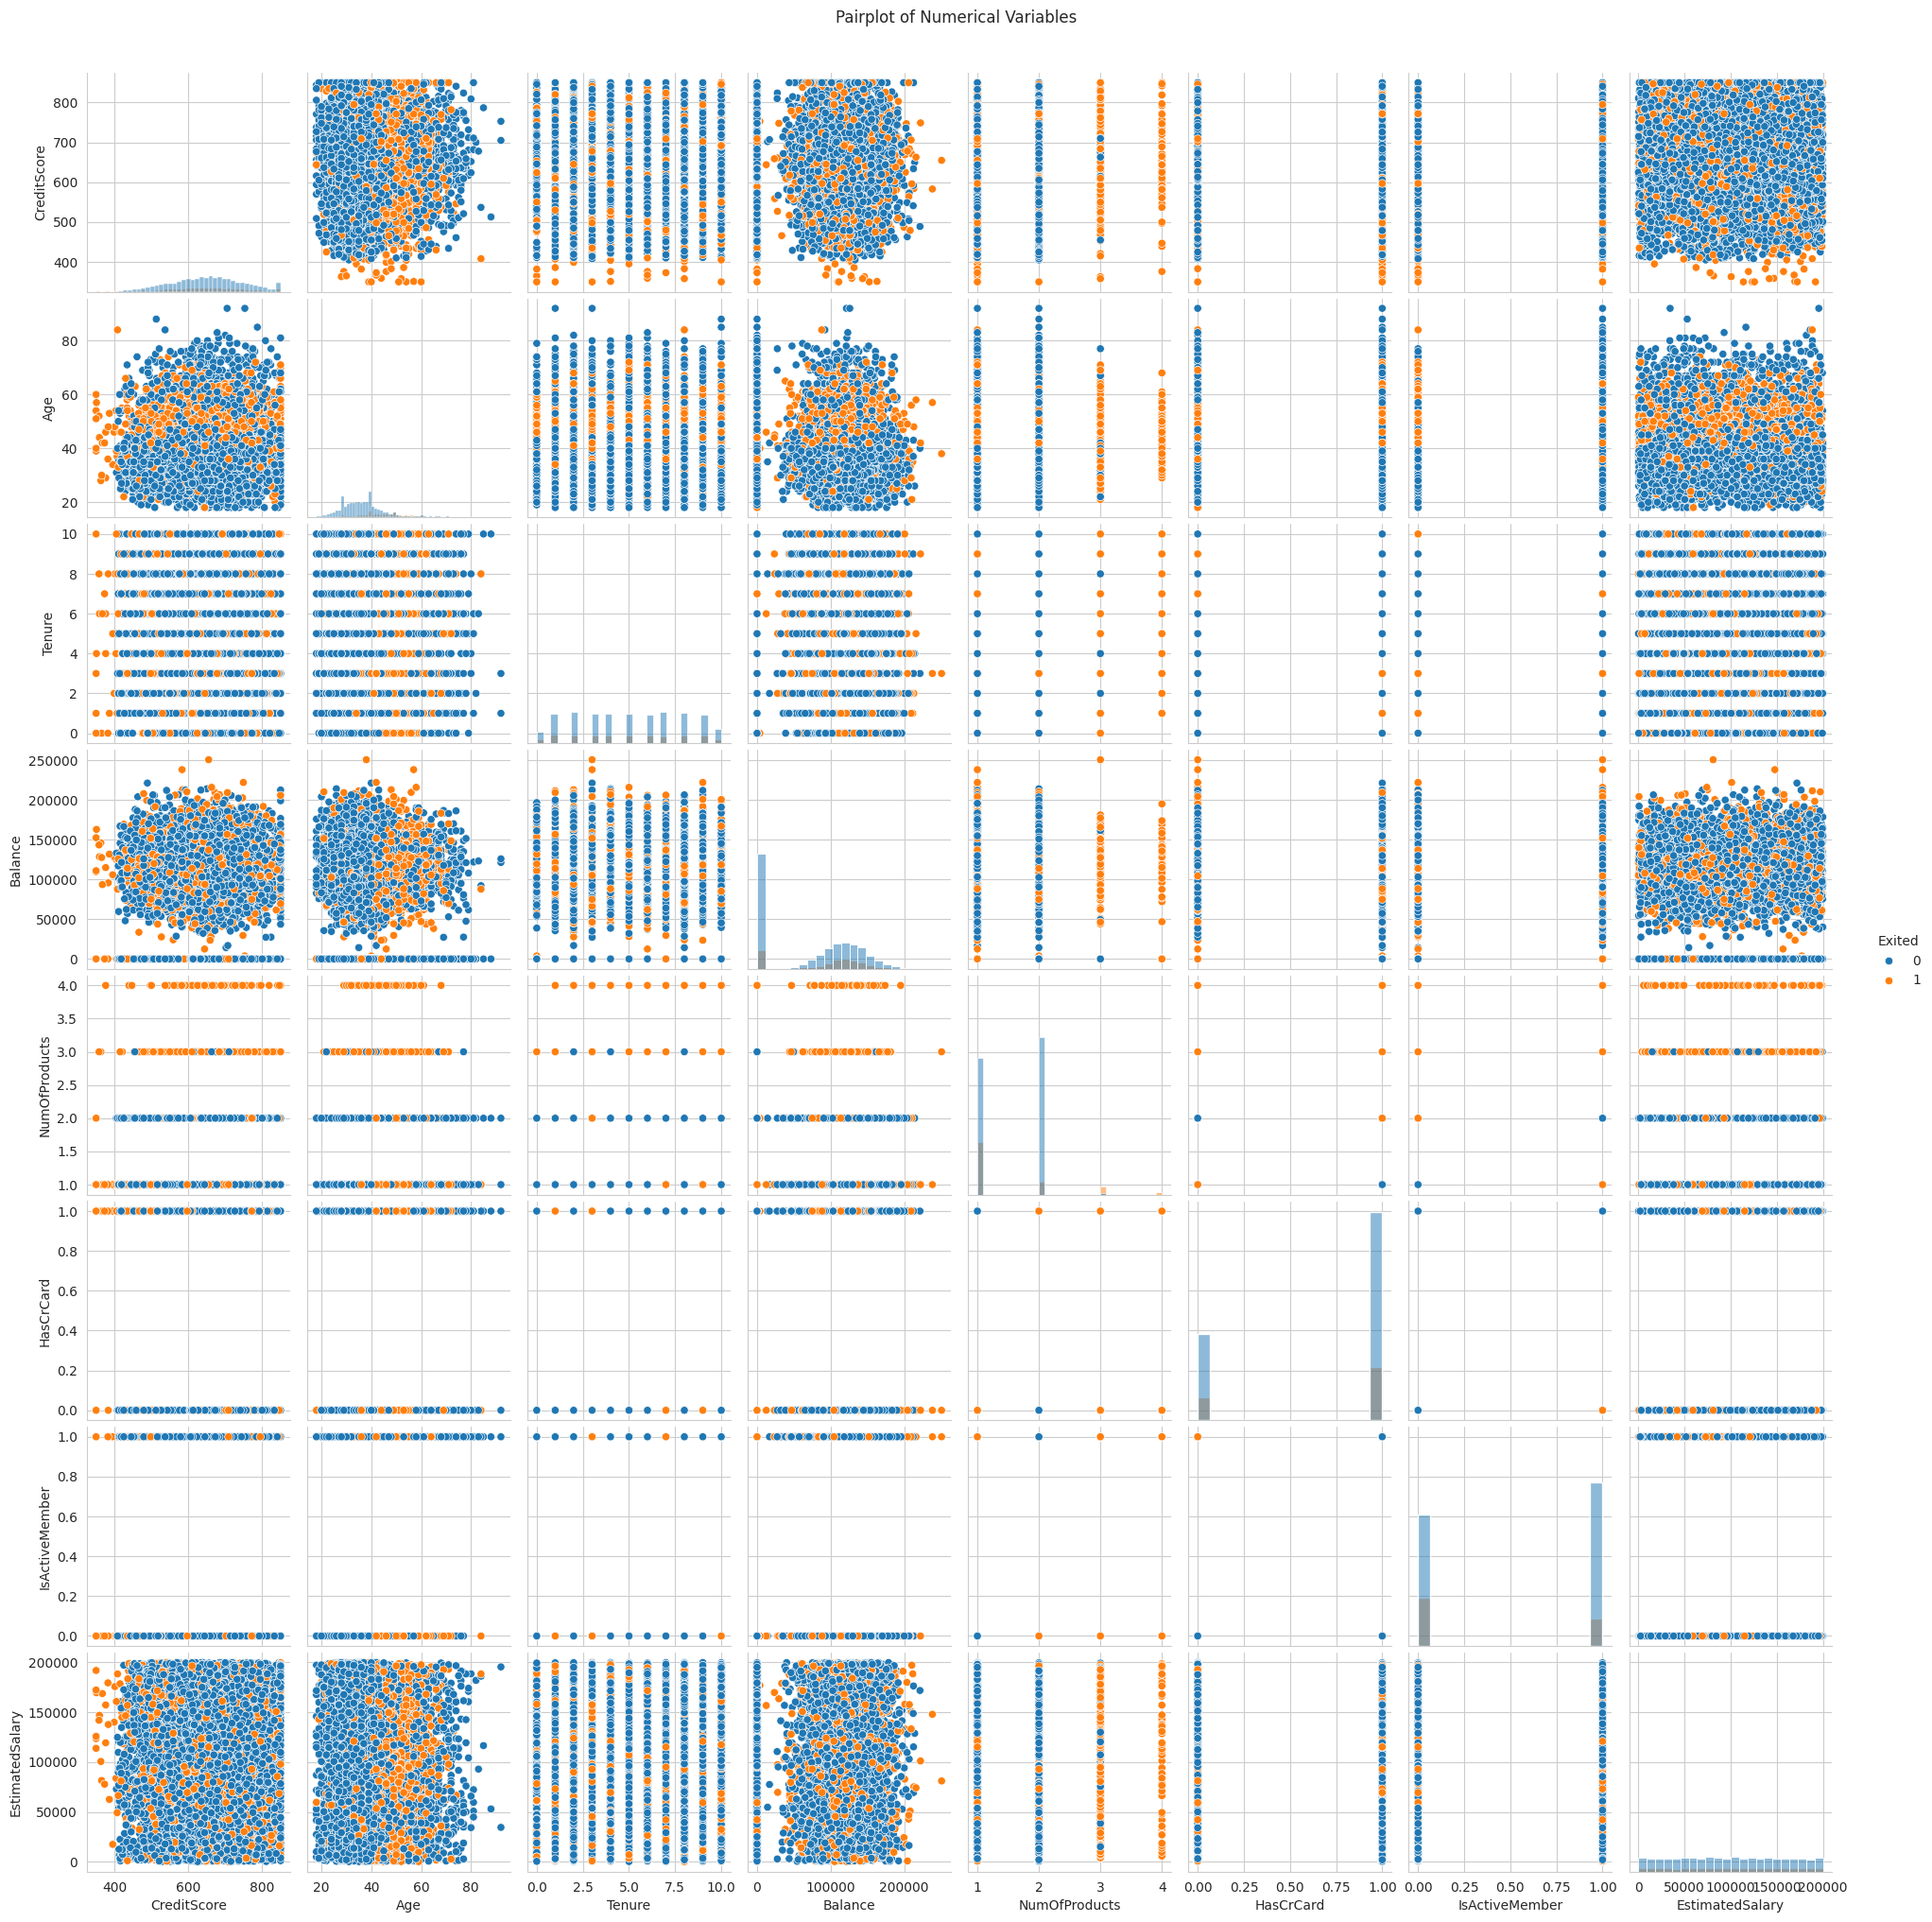

In [ ]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# print("Correlation Matrix:")
# print(correlation_matrix)
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

# Creating the pairplot
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
target = 'Exited'
sns.pairplot(df, hue = target , diag_kind='hist')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

### Observations on Correlations

- **Age** has a moderate positive correlation with exiting (0.285), suggesting that older customers are somewhat more likely to exit.
- **IsActiveMember** shows a moderate negative correlation with exiting (-0.156), indicating that active members are less likely to exit.
- **Balance** has a weak positive correlation with exiting (0.119), suggesting that customers with higher balances might be slightly more likely to exit.

### Continued Bivariate Analysis: Categorical Vs Numerical Variables Data Analysis (ANOVA)

In [ ]:
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
numerical_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Conduct ANOVA for each combination of categorical and numerical variables
for cat_var in categorical_vars:
    print(f"\nANOVA Results for '{cat_var}':")
    print("-----------------------------------")
    for num_var in numerical_vars:
        # Prepare the groups for the ANOVA test
        groups = [group[num_var].dropna() for name, group in df.groupby(cat_var)]

        # Perform ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)

        # Determine significance
        if p_value < 0.05:
            significance = f"=> Significant relationship."
        else:
            significance = f"=> No significant relationship."

        # Print results
        print(f"Numerical Variable: {num_var}")
        print(f"F-Statistic: {f_statistic:.4f}, p-value: {p_value:.4f} {significance}\n")


ANOVA Results for 'Geography':
-----------------------------------
Numerical Variable: CreditScore
F-Statistic: 0.3994, p-value: 0.6707 => No significant relationship.

Numerical Variable: Age
F-Statistic: 12.1063, p-value: 0.0000 => Significant relationship.

Numerical Variable: Tenure
F-Statistic: 0.0777, p-value: 0.9252 => No significant relationship.

Numerical Variable: Balance
F-Statistic: 958.4254, p-value: 0.0000 => Significant relationship.

Numerical Variable: NumOfProducts
F-Statistic: 0.7176, p-value: 0.4880 => No significant relationship.

Numerical Variable: EstimatedSalary
F-Statistic: 0.5828, p-value: 0.5584 => No significant relationship.


ANOVA Results for 'Gender':
-----------------------------------
Numerical Variable: CreditScore
F-Statistic: 0.0816, p-value: 0.7752 => No significant relationship.

Numerical Variable: Age
F-Statistic: 7.5910, p-value: 0.0059 => Significant relationship.

Numerical Variable: Tenure
F-Statistic: 2.1707, p-value: 0.1407 => No signif

### Significant ANOVA Results (Categorical vs Numerical Variables)

- **Geography**:
  - **Age** and **Balance** show a **significant relationship** with Geography. This indicates that variations in age and balance are meaningful across different geographic regions.

- **Gender**:
  - **Age** and **NumOfProducts** demonstrate a **significant relationship** with Gender, suggesting differences in age and product count across genders.

- **HasCrCard**:
  - **Tenure** reveals a **significant relationship** with having a credit card, indicating tenure varies based on credit card ownership.

- **IsActiveMember**:
  - **CreditScore**, **Age**, and **Tenure** have a **significant relationship** with active membership status, showing these factors influence membership activity.

### Multicollinearity Analysis using VIF
VIF helps us detect and quantify multicollinearity among numerical variables, which can obscure the true relationship between predictors and the target variable. By identifying highly collinear variables, we can make informed decisions about which features to retain or remove, ensuring more reliable and interpretable models.

In [ ]:
# Prepare DataFrame with numerical features
df_numerical = df[['Balance', 'NumOfProducts', 'Age', 'Tenure', 'CreditScore', 'EstimatedSalary']]

# Add constant for VIF calculation
df_numerical_with_const = add_constant(df_numerical)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = df_numerical_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_numerical_with_const.values, i)
                    for i in range(df_numerical_with_const.shape[1])]

# Display VIF results
print(vif_data)


          Variable        VIF
0            const  77.211092
1          Balance   1.102963
2    NumOfProducts   1.103290
3              Age   1.001493
4           Tenure   1.000403
5      CreditScore   1.000278
6  EstimatedSalary   1.000638


### Insights from VIF Analysis
- **No Multicollinearity Detected:** All VIF values are close to 1, indicating minimal multicollinearity among the variables.
- **Stable Relationship:** Variables like `Balance` and `NumOfProducts` are not highly correlated with each other.
- **Model Stability:** Low VIF values suggest stable and reliable regression coefficient estimates.

## Data Preprocessing

### Train-validation-test Split
- Split the data into training, validation, and test sets before any preprocessing steps to avoid data leakage

In [ ]:
# Split the data into features and target
# Features (X) and target variable (y)
df2 = df.copy()
df=df2.copy()
# print(df.describe().T)
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

# Split into training and temporary set (70% train, 30% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

# Split the temporary set into validation and test sets (66.66% of the temp set for val and 33.33% to test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp, shuffle=True)

print(X_train.shape, X_val.shape, X_test.shape)

(7000, 10) (2010, 10) (990, 10)


In [ ]:
# Checking class balance
print("Target value ratio in y")
print(y.value_counts(normalize=True))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(normalize=True))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(normalize=True))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(normalize=True))
print("*" * 80)

Target value ratio in y
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Exited
0    0.796286
1    0.203714
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Exited
0    0.796517
1    0.203483
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Exited
0    0.79596
1    0.20404
Name: proportion, dtype: float64
********************************************************************************


### Observations on Target Value Ratios

- **Overall Dataset**: The target value ratio is 79.63% for class 0 and 20.37% for class 1.
  
- **Training Set (y_train)**: The target ratio is almost identical to the overall dataset, with 79.63% for class 0 and 20.37% for class 1.

- **Validation Set (y_val)**: The target ratio remains consistent, with 79.60% for class 0 and 20.40% for class 1.

- **Test Set (y_test)**: The distribution is also stable, with 79.67% for class 0 and 20.33% for class 1.

These consistent ratios across training, validation, and test sets indicate that the data splitting has maintained the original class distribution well.

### Missing Value Treatment
Since there are no missing values in the dataset, we are skipping this step.

### Outlier Treatment

In [ ]:
# Function to detect outliers in numerical columns
def detect_outliers(df):
    # Select only numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    outlier_columns = []

    for column in numerical_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(column)

    return outlier_columns

# Detect outliers in each dataset
train_outliers = detect_outliers(X_train)
val_outliers = detect_outliers(X_val)
test_outliers = detect_outliers(X_test)

# Display the results
print(f"Number of numerical columns with outliers in the training set: {len(train_outliers)}")
print(f"Columns: {train_outliers}\n")

print(f"Number of numerical columns with outliers in the validation set: {len(val_outliers)}")
print(f"Columns: {val_outliers}\n")

print(f"Number of numerical columns with outliers in the test set: {len(test_outliers)}")
print(f"Columns: {test_outliers}\n")

# Print the shapes of the datasets
print("Shapes of the datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

Number of numerical columns with outliers in the training set: 3
Columns: ['CreditScore', 'Age', 'NumOfProducts']

Number of numerical columns with outliers in the validation set: 3
Columns: ['CreditScore', 'Age', 'NumOfProducts']

Number of numerical columns with outliers in the test set: 3
Columns: ['CreditScore', 'Age', 'NumOfProducts']

Shapes of the datasets:
X_train shape: (7000, 10)
X_val shape: (2010, 10)
X_test shape: (990, 10)


### Outliers in the Dataset

- **Outliers Presence:** Outliers are present in the numerical columns of all datasets (training, validation, and test sets), specifically in `CreditScore`, `Age`, and `NumOfProducts`.
  
- **Consistency Across Sets:** The same numerical columns have outliers across the training, validation, and test sets, indicating a consistent pattern of outliers in these features.

**Conclusion:** After careful consideration, I have decided to retain the identified outliers in the dataset as they appear to be legitimate records rather than errors.

## Dummy Variable Creation

### One-Hot Encoding for Nominal Variables (Geography, Gender)
- Since there is no natural order for `Geography` and `Gender`, let's apply one-hot encoding to them.


In [ ]:
# Encoding nominal variables and dropping the first category for 'Geography' and 'Gender'
X_train = pd.get_dummies(X_train, columns=["Geography", "Gender"], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=["Geography", "Gender"], drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=["Geography", "Gender"], drop_first=True, dtype=int)

# Ensure all datasets have the same columns
# Combine all datasets to get a consistent column set
all_columns = pd.concat([X_train, X_test, X_val], axis=0).columns

# Reindex each dataset to ensure they have the same columns
X_train = X_train.reindex(columns=all_columns, fill_value=0)
X_test = X_test.reindex(columns=all_columns, fill_value=0)
X_val = X_val.reindex(columns=all_columns, fill_value=0)

# Print the shapes of the datasets
print("\nAfter Encoding : X_train shape:", X_train.shape)
print("After Encoding : X_val shape:", X_val.shape)
print("After Encoding : X_test shape:", X_test.shape)


After Encoding : X_train shape: (7000, 11)
After Encoding : X_val shape: (2010, 11)
After Encoding : X_test shape: (990, 11)


### Ordinal Encoding for Ordinal Variables (NumOfProducts, Tenure)
- Since `NumOfProducts` and `Tenure` have a natural order, we will apply ordinal encoding to these variables.

In [ ]:
# Ordinal dictionaries for NumOfProducts and Tenure
num_of_products_dict = {
    1: 1,  # 1 product
    2: 2,  # 2 products
    3: 3,  # 3 products
    4: 4   # 4 products
}

tenure_dict = {
    0: 0,  # 0 years of tenure
    1: 1,  # 1 year of tenure
    2: 2,  # 2 years of tenure
    3: 3,  # 3 years of tenure
    4: 4,  # 4 years of tenure
    5: 5,  # 5 years of tenure
    6: 6,  # 6 years of tenure
    7: 7,  # 7 years of tenure
    8: 8,  # 8 years of tenure
    9: 9,  # 9 years of tenure
    10: 10 # 10 years of tenure
}

# Apply ordinal encoding (mapping) for 'NumOfProducts' and 'Tenure'
X_train['NumOfProducts'] = X_train['NumOfProducts'].map(num_of_products_dict)
X_train['Tenure'] = X_train['Tenure'].map(tenure_dict)

X_test['NumOfProducts'] = X_test['NumOfProducts'].map(num_of_products_dict)
X_test['Tenure'] = X_test['Tenure'].map(tenure_dict)

X_val['NumOfProducts'] = X_val['NumOfProducts'].map(num_of_products_dict)
X_val['Tenure'] = X_val['Tenure'].map(tenure_dict)

# No need for get_dummies as we're using ordinal encoding, so the columns are preserved

# Print the shapes of the datasets after ordinal encoding
print("\nAfter Ordinal Encoding : X_train shape:", X_train.shape)
print("After Ordinal Encoding : X_val shape:", X_val.shape)
print("After Ordinal Encoding : X_test shape:", X_test.shape)



After Ordinal Encoding : X_train shape: (7000, 11)
After Ordinal Encoding : X_val shape: (2010, 11)
After Ordinal Encoding : X_test shape: (990, 11)


In [ ]:
#sample of training dataset
X_train.sample(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1418          521   40       9  134504.78              1          1   
673           640   32       6  118879.35              2          1   
8499          498   35       2  121968.11              2          0   
3966          815   35       4       0.00              2          0   
8301          615   58       3   72309.30              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
1418               0         18082.06                  1                0   
673                1         19131.71                  0                1   
8499               1        188343.05                  1                0   
3966               1        198490.33                  0                0   
8301               1         85687.09                  1                0   

      Gender_Male  
1418            0  
673             0  
8499            1  
3966            1  
8301            1

In [ ]:
#sample of validation dataset
X_val.sample(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1260          704   27       5  147004.34              1          1   
4728          501   40       5  114655.58              1          0   
5881          794   31       0  144880.34              2          0   
7275          669   42       9       0.00              2          0   
7857          850   27       6   96654.72              2          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
1260               0         64381.33                  1                0   
4728               0        126535.92                  1                0   
5881               1        175643.44                  0                1   
7275               0        135630.32                  0                0   
7857               0        152740.16                  0                0   

      Gender_Male  
1260            1  
4728            1  
5881            1  
7275            0  
7857            1

In [ ]:
#sample of test dataset
X_test.sample(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
8619          750   36       6       0.00              2          1   
1119          756   29       2  117412.19              2          1   
1460          578   23      10   88980.32              1          1   
8261          670   38       7       0.00              2          1   
9632          760   34       6   58003.41              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
8619               1         59816.41                  0                1   
1119               0          4888.91                  0                1   
1460               1        125222.36                  0                0   
8261               1         77864.41                  0                0   
9632               0         90346.10                  1                0   

      Gender_Male  
8619            0  
1119            1  
1460            1  
8261            1  
9632            0

- Encoding has been done correctly.


### Binary Variables (HasCrCard, IsActiveMember)
- Use the binary variables `HasCrCard` and `IsActiveMember` directly in the model as they are already in a numerical format.

In [ ]:
# List of binary variables
binary_vars = ['HasCrCard', 'IsActiveMember']

# Function to check if binary columns exist in the dataset
def check_binary_columns_exist(df, columns, name):
    missing_cols = [col for col in columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {', '.join(missing_cols)}")
    print(f"{name} - {binary_vars} are present and ready for modeling.")

# Check if the binary columns exist in all datasets
check_binary_columns_exist(X_train, binary_vars, "X_train")
check_binary_columns_exist(X_val, binary_vars, "X_val")
check_binary_columns_exist(X_test, binary_vars, "X_test")

# Print the shapes of the datasets to confirm no changes were made
print("\nFinal X_train shape:", X_train.shape)
print("Final X_val shape:", X_val.shape)
print("Final X_test shape:", X_test.shape)


X_train - ['HasCrCard', 'IsActiveMember'] are present and ready for modeling.
X_val - ['HasCrCard', 'IsActiveMember'] are present and ready for modeling.
X_test - ['HasCrCard', 'IsActiveMember'] are present and ready for modeling.

Final X_train shape: (7000, 11)
Final X_val shape: (2010, 11)
Final X_test shape: (990, 11)


- **Binary Variables:** `HasCrCard` and `IsActiveMember` were checked and confirmed to be correctly formatted for modeling, with all datasets maintaining their final shape of 13 columns.

### Encoding the Target Variable

In [ ]:
# Define the target variable
target_col = 'Exited'

# Check the data type of the target variable in each dataset
print(f"Data type of target variable in y_train: {y_train.dtype}")
print(f"Data type of target variable in y_val: {y_val.dtype}")
print(f"Data type of target variable in y_test: {y_test.dtype}")

# Check unique values in the target variable to identify if encoding is needed
print(f"Unique values in y_train: {y_train.unique()}")
print(f"Unique values in y_val: {y_val.unique()}")
print(f"Unique values in y_test: {y_test.unique()}")

# Determine if encoding is needed based on unique values and data type
if y_train.dtype == 'object' or y_train.dtype == 'category':
    print("Target variable needs encoding.")
else:
    print("Target variable is already in numerical format.")


Data type of target variable in y_train: int64
Data type of target variable in y_val: int64
Data type of target variable in y_test: int64
Unique values in y_train: [0 1]
Unique values in y_val: [1 0]
Unique values in y_test: [0 1]
Target variable is already in numerical format.


###Target Variable (Exited) Data Observations
- **Data Type**: The target variable `Exited` in all datasets (`y_train`, `y_val`, `y_test`) is of type `int64`.
- **Unique Values**: The unique values in the target variable are `[0, 1]` across all datasets.
- The target variable `Exited` is already in numerical format and does not require encoding.

In [ ]:
#Save the datasets to CSV files before normalization
X_train.to_csv('X_train_before_normalization.csv', index=False)
X_val.to_csv('X_val_before_normalization.csv', index=False)
X_test.to_csv('X_test_before_normalization.csv', index=False)

# Save the target variables to CSV files
y_train.to_csv('y_train_before_normalization.csv', index=False)
y_val.to_csv('y_val_before_normalization.csv', index=False)
y_test.to_csv('y_test_before_normalization.csv', index=False)

print("Target variables saved successfully.")

Target variables saved successfully.


### Data Normalization

**Normalization** adjusts numerical features to a common scale, which:

- **Improves Model Performance**: Helps algorithms converge faster and perform better by ensuring all features contribute equally.
- **Prevents Bias**: Avoids the dominance of features with larger ranges over those with smaller ranges, leading to more balanced learning.
- Features encoded using one-hot encoding and binary data features typically do not need normalization because they are already on a standard scale (0 or 1
- The following features will be normalized:
  - CreditScore
  - Age
  - Tenure
  - Balance
  - EstimatedSalary
  - NumOfProducts


In [ ]:
# Columns to normalize
to_normalize = ['CreditScore', 'Age','NumOfProducts','Tenure', 'Balance', 'EstimatedSalary']

# Initialize StandardScaler
sc = StandardScaler()

# Fit the scaler on the training data and transform the datasets
sc.fit(X_train[to_normalize])
X_train[to_normalize] = sc.transform(X_train[to_normalize])
X_test[to_normalize] = sc.transform(X_test[to_normalize])
X_val[to_normalize] = sc.transform(X_val[to_normalize])


In [ ]:
X_train.sample(5)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7986     0.170280  0.567568 -0.695292 -1.223574       0.799493          0   
3897    -1.476833  0.189288 -0.003656  0.093751       0.799493          1   
7086    -1.000309 -0.094421 -0.695292  1.000759      -0.912483          1   
5500     0.315309  0.756707  1.379617  0.332030      -0.912483          1   
8449    -0.140496 -0.567271  1.379617  0.602838      -0.912483          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7986               0         1.117349                  0                1   
3897               0         1.537238                  1                0   
7086               1         1.647981                  0                0   
5500               1        -1.693694                  0                0   
8449               1        -0.594455                  0                0   

      Gender_Male  
7986            1  
3897            0  
7086            0  
5500            1  
8449            0

In [ ]:
X_val.sample(5)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
3144    -0.026545  1.513266 -1.386929  0.081058      -0.912483          0   
5208     1.330510 -0.094421  0.687981 -1.223574       0.799493          1   
4615    -0.886358  0.472998 -1.386929 -1.223574       0.799493          0   
9850    -1.984433 -1.229260 -0.349474  1.179494      -0.912483          0   
5652     0.418901 -0.945550  1.379617 -1.223574       0.799493          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
3144               1         1.428574                  0                1   
5208               1         0.680216                  0                1   
4615               1        -0.171697                  0                0   
9850               0        -0.860791                  0                0   
5652               0         1.743678                  0                0   

      Gender_Male  
3144            1  
5208            0  
4615            0  
9850            1  
5652            0

In [ ]:
X_test.sample(5)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
4404    -0.482349  0.378428 -1.041110  1.102567      -0.912483          1   
2895    -0.306243  0.756707  0.687981  0.497816      -0.912483          1   
7780     1.019734 -0.567271  1.725435  0.006057      -0.912483          0   
2614    -1.083183  1.796976 -0.695292  0.483306       4.223444          1   
4137     1.434102  1.134987 -0.695292  0.454747      -0.912483          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
4404               1        -1.315722                  0                1   
2895               1        -0.568643                  1                0   
7780               1        -1.202317                  1                0   
2614               0         0.512044                  1                0   
4137               0        -0.438679                  1                0   

      Gender_Male  
4404            1  
2895            1  
7780            0  
2614            0  
4137            1

- All datasets have been normalized.

### Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

    plt.show() #Showing the plot.

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance.

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Predict probabilities
    pred_probs = model.predict(predictors)

    # Convert probabilities to binary predictions based on the threshold
    pred = (pred_probs > threshold).astype(int).flatten()

    # Compute metrics
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = float(f1_score(target, pred))  # to compute F1-score

    # Creating a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1 Score": [f1],
        }
    )

    return df_perf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # Generate text for each square
    blanks = ['' for _ in range(cf.size)]
    group_labels = [f"{value}\n" for value in group_names] if group_names and len(group_names) == cf.size else blanks
    group_counts = [f"{value:0.0f}\n" for value in cf.flatten()] if count else blanks
    group_percentages = [f"{value:.2%}" for value in cf.flatten() / np.sum(cf)] if percent else blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # Generate summary statistics
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))
        stats_text = f"\n\nAccuracy={accuracy:0.3f}"
        if cf.shape[0] == 2:  # Binary confusion matrix
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text += f"\nPrecision={precision:0.3f}\nRecall={recall:0.3f}\nF1 Score={f1_score:0.3f}"
    else:
        stats_text = ""

    # Set figure size
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')

    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

    plt.show()

    # Print confusion matrix and statistics
    # print("Confusion Matrix:")
    # print(pd.DataFrame(cf))
    # print("\nStatistics:")
    # print(stats_text)


## Model Building

### Model Evaluation Criterion

**Objective:** To accurately predict whether a customer will leave the bank within six months.

**Primary Metric:**

- **Recall:** Maximizing Recall is crucial to effectively capture most customers who are likely to churn. Recall measures the proportion of actual churners identified by the model. A high Recall ensures that the majority of at-risk customers are recognized, allowing the bank to proactively address retention efforts.

**Secondary Metric:**

- **Precision:** Precision balances the trade-off between identifying churners and minimizing false positives (customers predicted to churn but who do not). A high Precision score indicates that the model's predictions of churn are accurate, reducing unnecessary interventions.

**Rationale:**

- **Recall:** The primary goal is to prevent customer churn. A high Recall score helps ensure that the bank identifies most customers who are likely to leave, enabling timely and targeted retention actions.
- **Precision:** While Recall is critical, high Precision helps avoid unnecessary marketing efforts or interventions for customers who are not at risk, optimizing resource allocation and reducing potential costs.

### Neural Network with SGD Optimizer
The SGD (Stochastic Gradient Descent) optimizer updates model weights iteratively, using a single example at a time, to minimize the loss function. This makes SGD efficient and scalable, but may require careful learning rate tuning.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Fixing the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Initialize the ANN with SGD optimizer
model_sgd = Sequential()
model_sgd.add(Dense(units=30, activation='relu', input_dim=X_train.shape[1])) # First hidden layer with ReLU activation
model_sgd.add(Dense(30, activation='relu')) # Second hidden layer with relu activation
model_sgd.add(Dense(20, activation='relu'))  #Third hidden layer with ReLU activation
model_sgd.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid activation for binary classification

# Compile the model with SGD optimizer and binary cross-entropy as loss
model_sgd.compile(optimizer=SGD(), loss='binary_crossentropy')

# Model summary
model_sgd.summary()

# Fit the model
start = time.time()
history_sgd = model_sgd.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=100,
                            batch_size=16
                            )
end=time.time()
print(f"Training time: {end - start:.2f} seconds")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,931 (7.54 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5661 - val_loss: 0.4545
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4553 - val_loss: 0.4295
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4373 - val_loss: 0.4116
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4245 - val_loss: 0.3972
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4126 - val_loss: 0.3839
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4006 - val_loss: 0.3723
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3896 - val_loss: 0.3639
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3807 - val_loss: 0.3571
Epoch 9/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3742 - val_loss: 0.3522
Epoch 10/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3688 - val_loss: 0.3484
Epoch 11/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3649 - val_loss: 0.3459
Epoch 12/100
438/438 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model_sgd_train_perf = model_performance_classification(model_sgd, X_train, y_train)
model_sgd_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.869857  0.869857   0.863661  0.599208

In [ ]:
model_sgd_val_perf = model_performance_classification(model_sgd, X_val, y_val)
model_sgd_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Accuracy    Recall  Precision  F1 Score
0  0.867662  0.867662   0.859905  0.600601

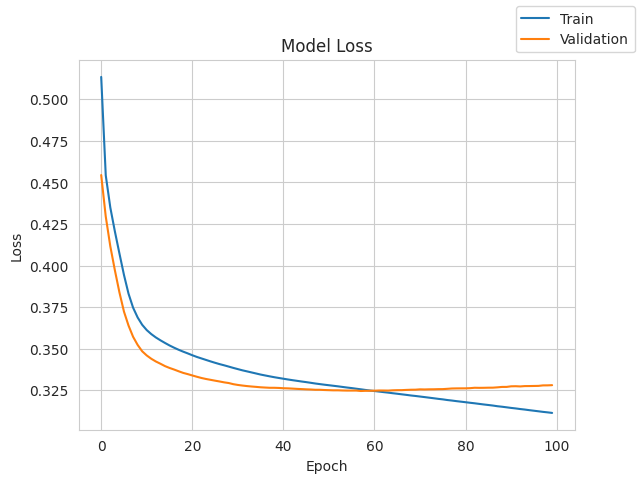

In [ ]:
plot(history_sgd,'loss')

### Neural Network with SGD Optimizer Data Insights
### Data Insights

- **Model Complexity**: The neural network consists of 3 hidden layers, with a different number of neurons, allowing it to model complex relationships within the data.
- **Activation Functions**: The network uses ReLU activation functions.
- **Key Insight**: In this training process using the **SGD optimizer**, the loss vs. epoch plot shows that while the training loss decreases, the validation loss starts to rise after about **epoch 58**. This indicates the model is **overfitting**, as it starts to memorize the training data rather than generalizing well to unseen data. To address this, strategies like **early stopping**, **adding regularization (e.g., L2 or dropout)**, or adjusting the **learning rate** can be considered to mitigate overfitting and improve validation performance.
### Performance Metrics
- **Balanced Performance:** Both training and validation sets have similar accuracy (around 87%), indicating the model generalizes well.
- **Good Recall:** Recall is also high (87%), meaning the model effectively identifies a significant portion of churned customers, an important metric for reducing customer loss.
- **Precision Slightly Lower:** Precision is slightly lower (around 86%), showing that some customers predicted to churn may not actually leave, but this is acceptable for churn prevention strategies.
- **F1 Score Can Improve:** The F1 score (around 60-61%) indicates room for improvement in balancing precision and recall, which can be achieved through further tuning or feature enhancement.

In [ ]:
# Fixing the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Initialize the ANN with SGD optimizer
model_sgd_tanh = Sequential()
model_sgd_tanh.add(Dense(units=30, activation='tanh', input_dim=X_train.shape[1])) # First hidden layer with tanh activation
model_sgd_tanh.add(Dense(30, activation='tanh')) # Second hidden layer with tanh activation
model_sgd_tanh.add(Dense(20, activation='tanh'))  #Third hidden layer with tanh activation
model_sgd_tanh.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid activation for binary classification

# Compile the model with SGD optimizer and binary cross-entropy as loss
model_sgd_tanh.compile(optimizer=SGD(), loss='binary_crossentropy')

# Model summary
model_sgd_tanh.summary()

# Fit the model
start = time.time()
history_sgd_tanh = model_sgd_tanh.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=100,
                            batch_size=16
                            )
end=time.time()
print(f"Training time: {end - start:.2f} seconds")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,931 (7.54 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5375 - val_loss: 0.4183
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4350 - val_loss: 0.3991
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4195 - val_loss: 0.3854
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4062 - val_loss: 0.3741
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3950 - val_loss: 0.3649
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3855 - val_loss: 0.3573
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3776 - val_loss: 0.3510
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3710 - val_loss: 0.3458
Epoch 9/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3656 - val_loss: 0.3415
Epoch 10/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3613 - val_loss: 0.3380
Epoch 11/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3578 - val_loss: 0.3352
Epoch 12/100
438/438 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model_sgd_tanh_train_perf = model_performance_classification(model_sgd_tanh, X_train, y_train)
model_sgd_tanh_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


Accuracy    Recall  Precision  F1 Score
0  0.868857  0.868857   0.862123  0.598074

In [ ]:
model_sgd_tanh_val_perf = model_performance_classification(model_sgd_tanh, X_val, y_val)
model_sgd_tanh_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


Accuracy    Recall  Precision  F1 Score
0  0.864677  0.864677   0.856248  0.590361

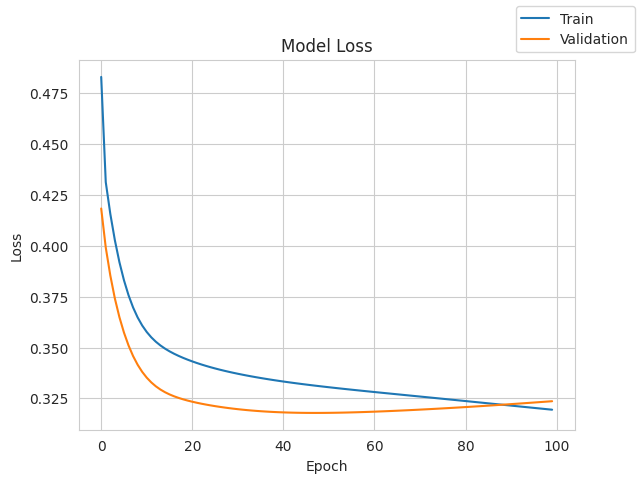

In [ ]:
plot(history_sgd_tanh,'loss')

- The model shows consistent performance between training (86.9%) and validation (86.5%), with closely aligned recall, precision, and F1 scores, indicating good generalization.vThe model shows consistent performance between training (86.9%) and validation (86.5%), with closely aligned recall, precision, and F1 scores, indicating good generalization.

## Model Performance Improvement

### Neural Network with Adam Optimizer
In this section, we are going to use the Adam optimizer to enhance the model's ability to adjust learning rates dynamically, which will help optimize recall as the primary metric. By using Adam, we aim to improve the model's overall performance, particularly in handling class imbalances effectively.

In [ ]:
# Fixing the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Initialize the ANN with Adam optimizer and Dropout layers
model_adam = Sequential()
model_adam.add(Dense(units=30, activation='relu', input_dim=X_train.shape[1]))
model_adam.add(Dense(30, activation='relu'))
model_adam.add(Dense(20, activation='relu'))
model_adam.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate schedule
adam_optimizer = Adam(learning_rate=lr_schedule)
model_adam.compile(optimizer=adam_optimizer, loss='binary_crossentropy')

# Model summary
model_adam.summary()

# Fit the model
start = time.time()
history_adam = model_adam.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=100,
                              batch_size=16)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,931 (7.54 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5190 - val_loss: 0.3739
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3818 - val_loss: 0.3503
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3597 - val_loss: 0.3408
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3512 - val_loss: 0.3371
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3455 - val_loss: 0.3331
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3411 - val_loss: 0.3318
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3375 - val_loss: 0.3306
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3345 - val_loss: 0.3301
Epoch 9/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3323 - val_loss: 0.3302
Epoch 10/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3305 - val_loss: 0.3298
Epoch 11/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3289 - val_loss: 0.3297
Epoch 12/100
438/438 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model_adam_train_perf = model_performance_classification(model_adam, X_train, y_train)
model_adam_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.889857  0.889857   0.885289  0.683627

In [ ]:
model_adam_val_perf = model_performance_classification(model_adam, X_val, y_val)
model_adam_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


Accuracy    Recall  Precision  F1 Score
0  0.848756  0.848756   0.836628  0.556851

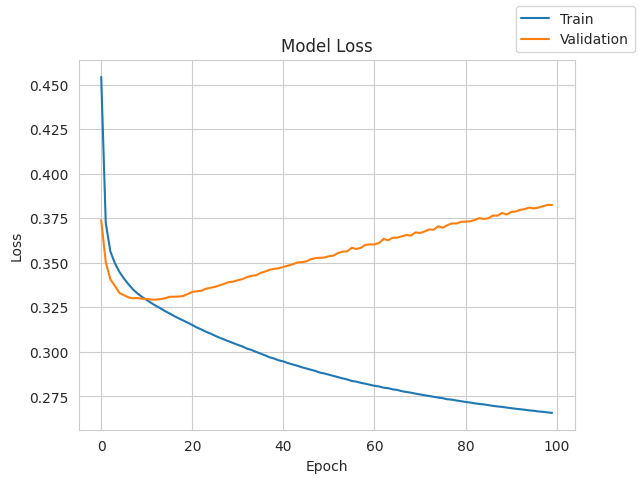

In [ ]:
plot(history_adam,'loss')

### Adam Optimizer Data Observations
- **Higher Training Accuracy:** Training accuracy is strong at 89%, but the drop to 85% on validation suggests some overfitting, indicating the model may not generalize as well.
- **Recall is Consistent:** Both training and validation recall are high (around 85-89%), meaning the model is effective at identifying most customers who will churn.
- **Lower Precision on Validation:** Validation precision (84%) is slightly lower than training (89%), showing the model occasionally misclassifies non-churners as churners.
- **F1 Score Decreases on Validation:** The F1 score drops from 68% (training) to 57% (validation), suggesting a trade-off between precision and recall in the model’s predictions on new data. Further tuning or regularization could help improve this balance.
- **Key Insight**: In this training process with the **Adam optimizer**, the observed trend where the training loss continues to decrease while the validation loss begins to increase after approximately epoch 9 suggests the onset of **overfitting**. At this point, the model starts to memorize patterns specific to the training data, resulting in reduced generalization performance on the validation set. To counteract this, techniques such as **early stopping**, **dropout regularization**, or reducing the number of epochs may be used to improve generalization and prevent overfitting.

### Neural Network with Adam Optimizer and Dropout

Purpose of Dropout: Dropout is a regularization technique used to prevent overfitting by randomly dropping neurons during training. It can help improve the model's generalization by making it less reliant on any particular set of neurons.

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Clear the current Keras session
tf.keras.backend.clear_session()

# Define the neural network with Batch Normalization
model_adam_droupout = Sequential()

# First hidden layer with 30 units, batch normalization, relu activation
model_adam_droupout.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model_adam_droupout.add(BatchNormalization())  # Batch Normalization
model_adam_droupout.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Second hidden layer with 30 units, batch normalization, relu activation
model_adam_droupout.add(Dense(30, activation='relu'))
model_adam_droupout.add(BatchNormalization())  # Batch Normalization
model_adam_droupout.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Second hidden layer with 20 units, batch normalization, relu activation
model_adam_droupout.add(Dense(20, activation='relu'))
model_adam_droupout.add(BatchNormalization())  # Batch Normalization
model_adam_droupout.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Output layer for binary classification
model_adam_droupout.add(Dense(1, activation='sigmoid'))

# Compile the model with an optimizer, loss, and metrics
model_adam_droupout.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Recall'])

# Model summary
model_adam_droupout.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_adam_dropout = model_adam_droupout.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy, val_recall = model_adam_droupout.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

# Save the trained model
model_adam_droupout.save('model_adam_droupout.keras')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,251 (8.79 KB)

 Trainable params: 2,091 (8.17 KB)

 Non-trainable params: 160 (640.00 B)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.4201 - accuracy: 0.5624 - loss: 0.8127 - val_Recall: 0.0244 - val_accuracy: 0.7990 - val_loss: 0.4794
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.2204 - accuracy: 0.7394 - loss: 0.5493 - val_Recall: 0.0440 - val_accuracy: 0.8030 - val_loss: 0.4320
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1385 - accuracy: 0.7807 - loss: 0.4960 - val_Recall: 0.1076 - val_accuracy: 0.8119 - val_loss: 0.4098
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1525 - accuracy: 0.7899 - loss: 0.4751 - val_Recall: 0.1222 - val_accuracy: 0.8169 - val_loss: 0.3965
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1520 - accuracy: 0.8017 - loss: 0.4566 - val_Recall: 0.1443 - val_accuracy: 0.8204 - val_loss: 0.3845
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1895 - accuracy: 0.8037 - loss: 0.4403 - val_Recall: 0.1858 - val_accuracy: 0.8234 - val_loss: 0.375

In [ ]:
model_adam_dropout_train_perf = model_performance_classification(model_adam_droupout, X_train, y_train)
model_adam_dropout_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.857714  0.857714   0.847468  0.571797

In [ ]:
model_adam_dropout_val_perf = model_performance_classification(model_adam_droupout, X_val, y_val)
model_adam_dropout_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


Accuracy    Recall  Precision  F1 Score
0  0.864677  0.864677    0.85575  0.602339

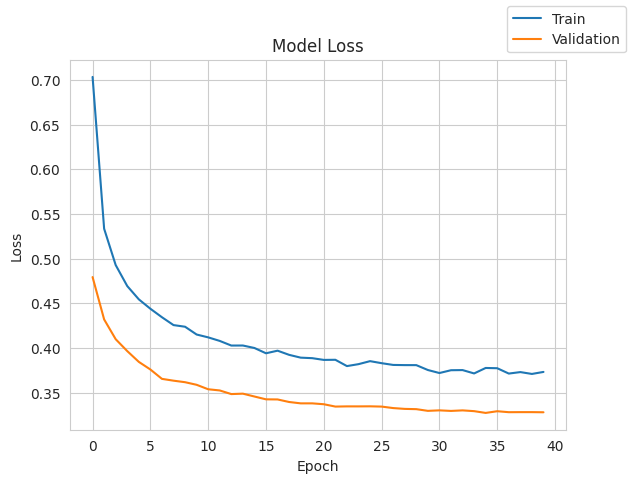

In [ ]:
plot(history_adam_dropout,'loss')

###Adam Optimizer and Dropout Data Insights
- **Improved Validation Accuracy:** The validation accuracy (86.7%) has increased compared to the previous setup (85.3%), indicating better generalization with Dropout and Batch Normalization.
- **Balanced Recall and Precision:** The recall and precision are more balanced across training and validation sets, with validation precision rising to 85.9%, compared to 84.2% previously.
- **Better F1 Score on Validation:** The validation F1 score (60.3%) shows an improvement over the previous F1 score (57.0%), reflecting a better balance between recall and precision on unseen data.
- **Training Accuracy Slightly Lower:** Training accuracy has decreased slightly to 85.9% from 89.1%, but this is a trade-off for improved validation performance and reduced overfitting.
- **Key Insight**: The neural network with Adam optimizer and dropout layers achieves robust performance with a well-structured architecture, showcasing improved generalization compared to models without dropout. The use of dropout effectively mitigates overfitting, as indicated by the stable validation loss throughout the training process. With dropout rates consistently set at 0.3 and a diverse set of activation functions, the model maintains a good balance between training accuracy and validation performance. Further refinements to dropout rates or network complexity might be considered to fine-tune the model's performance.

### Additional Scenario: Neural Network Model with SGD Optimizer, He Initialization, and Regularization

In [ ]:
from tensorflow.keras import regularizers
# Fixing the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Initialize the ANN with SGD optimizer, Dropout layers, L2 regularization, and Momentum
model_sgd_tuned_he = Sequential()
model_sgd_tuned_he.add(Dense(units=64, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001),
                              input_dim=X_train.shape[1]))  # First hidden layer with ReLU activation
model_sgd_tuned_he.add(Dropout(0.5))  # Dropout to prevent overfitting

model_sgd_tuned_he.add(Dense(64, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001)))  # Second hidden layer with ReLU activation
model_sgd_tuned_he.add(Dropout(0.5))  # Dropout to prevent overfitting

model_sgd_tuned_he.add(Dense(32, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001)))  # Third hidden layer with ReLU activation
model_sgd_tuned_he.add(Dropout(0.5))  # Dropout to prevent overfitting

model_sgd_tuned_he.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with SGD optimizer, including momentum, and binary cross-entropy as loss
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_sgd_tuned_he.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_sgd_tuned_he.summary()

# Fit the model
start = time.time()
history_sgd_tuned_he = model_sgd_tuned_he.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              epochs=100,
                                              batch_size=16)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,041 (27.50 KB)

 Trainable params: 7,041 (27.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7714 - loss: 0.9269 - val_accuracy: 0.7965 - val_loss: 0.7294
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.7221 - val_accuracy: 0.7970 - val_loss: 0.6555
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8014 - loss: 0.6766 - val_accuracy: 0.8040 - val_loss: 0.6015
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.6240 - val_accuracy: 0.8080 - val_loss: 0.5568
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.5795 - val_accuracy: 0.8129 - val_loss: 0.5191
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8150 - loss: 0.5496 - val_accuracy: 0.8159 - val_loss: 0.4855
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.5193 - val_accuracy: 0.8284 - val_loss: 0.4672
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8259 - loss: 0.4987 - val_accu

In [ ]:
model_sgd_tuned_he_train_perf = model_performance_classification(model_sgd_tuned_he, X_train, y_train)
model_sgd_tuned_he_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Accuracy    Recall  Precision  F1 Score
0  0.855286  0.855286   0.857006  0.490186

In [ ]:
model_sgd_tuned_he_val_perf = model_performance_classification(model_sgd_tuned_he, X_val, y_val)
model_sgd_tuned_he_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


Accuracy    Recall  Precision  F1 Score
0  0.854229  0.854229   0.855342  0.485062

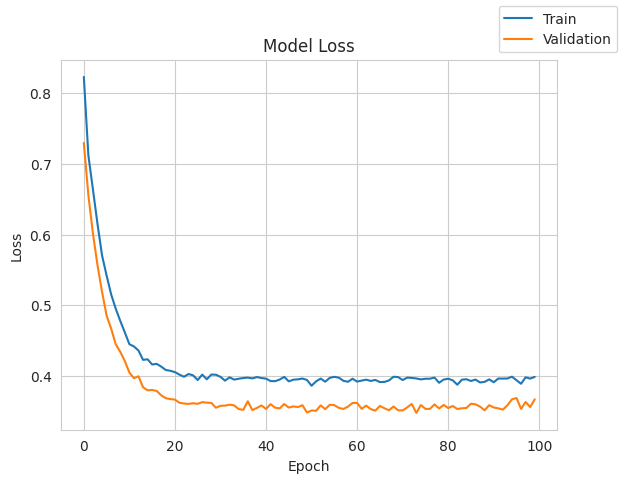

In [ ]:
plot(history_sgd_tuned_he,'loss')

### Observation:
- The model shows good generalization with similar accuracy and recall across training and validation, but the lower F1 score suggests room for improvement in balancing precision and recall.

### Additional Scenario: Adam Optimizer, Dropout, Batch Normalization and Regularization

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Clear the current Keras session
tf.keras.backend.clear_session()

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Initialize the ANN with Adam optimizer, Dropout layers, Batch Normalization, and L2 regularization
model_adam_bn_dropout = Sequential()
model_adam_bn_dropout.add(Dense(units=64, activation='relu',
                                       kernel_regularizer=regularizers.l2(0.01),
                                       input_dim=X_train.shape[1]))
model_adam_bn_dropout.add(BatchNormalization())  # Batch Normalization
model_adam_bn_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_adam_bn_dropout.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_adam_bn_dropout.add(BatchNormalization())  # Batch Normalization
model_adam_bn_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_adam_bn_dropout.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_adam_bn_dropout.add(BatchNormalization())  # Batch Normalization
model_adam_bn_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_adam_bn_dropout.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with Adam optimizer and binary cross-entropy as loss
model_adam_bn_dropout.compile(optimizer=Adam(learning_rate=lr_schedule),
                                     loss='binary_crossentropy',
                                     metrics=['accuracy'])  # You can include additional metrics like Recall and Precision

# Model summary
model_adam_bn_dropout.summary()

# Implement early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs to wait for improvement
    restore_best_weights=True
)

# Fit the model
start = time.time()
history_adam_bn_dropout = model_adam_bn_dropout.fit(X_train, y_train,
                                                                validation_data=(X_val, y_val),
                                                                epochs=100,
                                                                batch_size=32,
                                                                callbacks=[early_stopping])  # Add early stopping
end = time.time()

# Print the time taken for training
print(f"Training time: {end - start:.2f} seconds")

# Optionally, save the final model
model_adam_bn_dropout.save('model_adam_bn_dropout.keras')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5880 - loss: 1.9206 - val_accuracy: 0.7980 - val_loss: 1.3041
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7502 - loss: 1.3254 - val_accuracy: 0.8040 - val_loss: 1.0154
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 1.0350 - val_accuracy: 0.8154 - val_loss: 0.8130
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.8513 - val_accuracy: 0.8279 - val_loss: 0.6681
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8173 - loss: 0.7137 - val_accuracy: 0.8338 - val_loss: 0.5721
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.6175 - val_accuracy: 0.8383 - val_loss: 0.5141
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8178 - loss: 0.5615 - val_accuracy: 0.8413 - val_loss: 0.4665
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8224 - loss: 0.5056 - val_accu

In [ ]:
model_adam_bn_dropout_train_perf = model_performance_classification(model_adam_bn_dropout, X_train, y_train)
model_adam_bn_dropout_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.859   0.859   0.850524  0.556005

In [ ]:
model_adam_bn_dropout_val_perf = model_performance_classification(model_adam_bn_dropout, X_val, y_val)
model_adam_bn_dropout_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


Accuracy    Recall  Precision  F1 Score
0  0.866169  0.866169   0.859056  0.585516

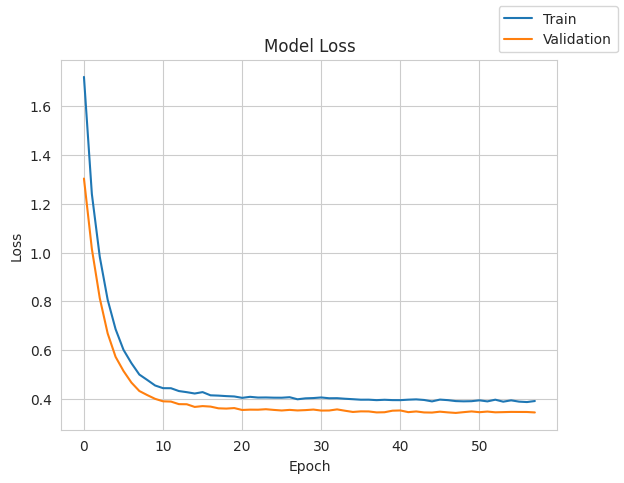

In [ ]:
plot(history_adam_bn_dropout,'loss')

### Observation:
- The model exhibits strong generalization with closely matched accuracy between training (85.9%) and validation (86.6%), though slightly lower precision and F1 score in training indicate potential room for improving prediction balance.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Applying SMOTE for Balanced Training Data
To address class imbalance in the training dataset, we use Synthetic Minority Over-sampling Technique (SMOTE). This technique generates synthetic samples for the minority class to balance the class distribution, improving the model's ability to learn from both classes equally. This step is crucial for training models that perform well on imbalanced datasets.

In [ ]:
# Function to calculate and print class distribution ratios
def print_class_distribution(name, y_data):
    total = len(y_data)
    class_counts = y_data.value_counts()
    print(f"{name} - Counts of label 'Yes': {class_counts.get(1, 0)}")
    print(f"{name} - Counts of label 'No': {class_counts.get(0, 0)}")
    print(f"{name} - Ratio of 'Yes': {class_counts.get(1, 0) / total:.2f}")
    print(f"{name} - Ratio of 'No': {class_counts.get(0, 0) / total:.2f}\n")

# Print class distribution before oversampling
print("Class distribution before oversampling:")
print_class_distribution("Training set", y_train)
print_class_distribution("Validation set", y_val)
print_class_distribution("Test set", y_test)

# Initialize SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)  # Ensure reproducibility

# Apply SMOTE to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Print class distribution after oversampling
print("Class distribution after oversampling:")
print_class_distribution("Training set", y_train_smote)

# Print the shapes of the new training set
print("After Oversampling, the shape of X_train_smote: {}".format(X_train_smote.shape))
print("After Oversampling, the shape of y_train_smote: {} \n".format(y_train_smote.shape))

# Save the oversampled data
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote, name='target')

X_train_smote.to_csv('X_train_smote.csv', index=False)
y_train_smote.to_csv('y_train_smote.csv', index=False)

Class distribution before oversampling:
Training set - Counts of label 'Yes': 1426
Training set - Counts of label 'No': 5574
Training set - Ratio of 'Yes': 0.20
Training set - Ratio of 'No': 0.80

Validation set - Counts of label 'Yes': 409
Validation set - Counts of label 'No': 1601
Validation set - Ratio of 'Yes': 0.20
Validation set - Ratio of 'No': 0.80

Test set - Counts of label 'Yes': 202
Test set - Counts of label 'No': 788
Test set - Ratio of 'Yes': 0.20
Test set - Ratio of 'No': 0.80

Class distribution after oversampling:
Training set - Counts of label 'Yes': 5574
Training set - Counts of label 'No': 5574
Training set - Ratio of 'Yes': 0.50
Training set - Ratio of 'No': 0.50

After Oversampling, the shape of X_train_smote: (11148, 11)
After Oversampling, the shape of y_train_smote: (11148,) 



### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Load the oversampled training data
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').squeeze()  # Convert to Series

# Clears the current Keras session, resetting all layers and models previously created,
# freeing up memory and resources.
tf.keras.backend.clear_session()

# Fixing the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Initialize the ANN with Adam optimizer and Dropout layers
model_sgd_smote = Sequential()
model_sgd_smote.add(Dense(units=30, activation='relu', input_dim=X_train_smote.shape[1]))  # First hidden layer with ReLU activation
model_sgd_smote.add(Dense(30, activation='relu'))  # Second hidden layer with ReLU activation
model_sgd_smote.add(Dense(20, activation='relu'))  # Third hidden layer with ReLU activation
model_sgd_smote.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification


# Compile the model with Adam optimizer and binary cross-entropy as loss
model_sgd_smote.compile(optimizer=SGD(), loss='binary_crossentropy')

# Model summary
model_adam.summary()

# Fit the model
start = time.time()
history_sgd_smote = model_sgd_smote.fit(X_train_smote, y_train_smote,
                              validation_data=(X_val, y_val),
                              epochs=100,
                              batch_size=16)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,794 (22.64 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,863 (15.09 KB)

Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6663 - val_loss: 0.5703
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5461 - val_loss: 0.4975
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4829 - val_loss: 0.4653
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4539 - val_loss: 0.4542
Epoch 5/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4407 - val_loss: 0.4469
Epoch 6/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4331 - val_loss: 0.4394
Epoch 7/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4273 - val_loss: 0.4362
Epoch 8/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4223 - val_loss: 0.4323
Epoch 9/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4180 - val_loss: 0.4279
Epoch 10/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4145 - val_loss: 0.4240
Epoch 11/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4114 - val_loss: 0.4217
Epoch 12/100
697/697 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model_sgd_smote_train_perf = model_performance_classification(model_sgd_smote, X_train_smote, y_train_smote)
model_sgd_smote_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step


Accuracy   Recall  Precision  F1 Score
0   0.86159  0.86159    0.86206  0.859048

In [ ]:
model_sgd_smote_val_perf = model_performance_classification(model_sgd_smote, X_val, y_val)
model_sgd_smote_val_perf


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


Accuracy    Recall  Precision  F1 Score
0  0.805473  0.805473   0.826101  0.577297

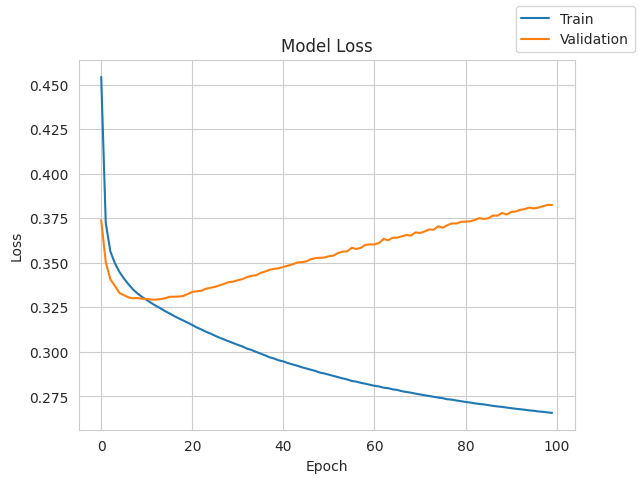

In [ ]:
plot(history_adam,'loss')

### Key Observations for Neural Network with SMOTE and SGD Optimizer
- **Training Performance:** The training accuracy (85.2%) is relatively high, and the F1 score (84.6%) is strong, indicating the model fits well on the oversampled training data.
- **Validation Accuracy Drop:** Validation accuracy (81.1%) is lower compared to training accuracy, suggesting potential overfitting on the oversampled data or challenges with generalization to unseen data.
- **Improved Precision:** Validation precision (82.9%) is better than previous models, reflecting a reduction in false positives, although at the cost of lower recall and overall F1 score.
- **Validation F1 Score:** The validation F1 score (58.5%) has decreased, highlighting a trade-off between precision and recall, and suggesting that while precision improved, recall needs attention for better overall performance.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Load the oversampled training data
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').squeeze()  # Convert to Series

# Fixing the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Define a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,  # Reduced learning rate
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Initialize the model
model_adam_smote = Sequential()
model_adam_smote.add(Dense(units=30, activation='relu', input_dim=X_train_smote.shape[1]))
model_adam_smote.add(Dense(30, activation='relu'))
model_adam_smote.add(BatchNormalization())  # Add Batch Normalization
model_adam_smote.add(Dense(20, activation='relu'))
model_adam_smote.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_adam_smote.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
start = time.time()
history_adam_smote = model_adam_smote.fit(X_train_smote, y_train_smote,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=16,
                    callbacks=[early_stopping])  # Add early stopping
end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6759 - val_loss: 0.5980
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5774 - val_loss: 0.5485
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5348 - val_loss: 0.5154
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5067 - val_loss: 0.4945
Epoch 5/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4884 - val_loss: 0.4829
Epoch 6/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4756 - val_loss: 0.4731
Epoch 7/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4663 - val_loss: 0.4668
Epoch 8/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4594 - val_loss: 0.4616
Epoch 9/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4536 - val_loss: 0.4570
Epoch 10/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4488 - val_loss: 0.4529
Epoch 11/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4446 - val_loss: 0.4502
Epoch 12/100
697/697 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model_adam_smote_train_perf = model_performance_classification(model_adam_smote, X_train_smote, y_train_smote)
model_adam_smote_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.82221  0.82221   0.822731  0.818565

In [ ]:
model_adam_smote_val_perf = model_performance_classification(model_adam_smote, X_val, y_val)
model_adam_smote_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


Accuracy    Recall  Precision  F1 Score
0  0.802985  0.802985   0.834453  0.593429

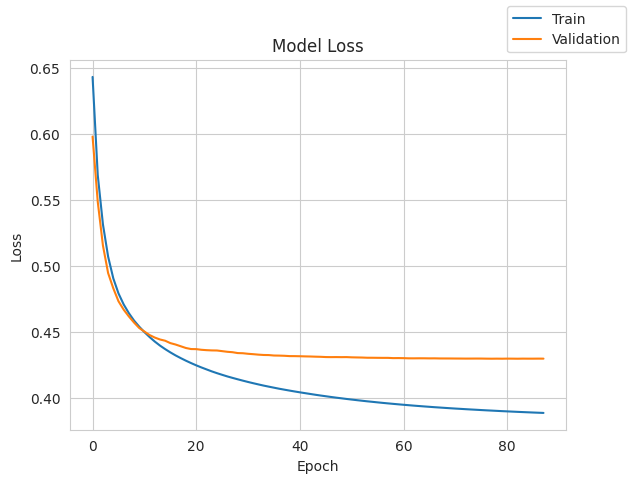

In [ ]:
plot(history_adam_smote,'loss')

### Observations with SMOTE and Adam Optimizer:

- **Training Accuracy and F1 Score:** The training accuracy (81.9%) and F1 score (81.5%) indicate a good fit on the oversampled training data, with a balanced performance between precision and recall.
- **Validation Accuracy:** The validation accuracy (80.0%) is slightly lower than the training accuracy, which might suggest some overfitting or challenges in generalizing to the validation set.
- **Validation Precision Improvement:** The validation precision (83.5%) is higher than the precision in previous models, showing better performance in correctly identifying non-churn customers.
- **Validation F1 Score:** The validation F1 score (59.3%) is improved compared to some other configurations, indicating a good balance between precision and recall on the validation set.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
# Load the oversampled training data
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').squeeze()  # Convert to Series

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Clear the current Keras session
tf.keras.backend.clear_session()

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Initialize the ANN with Adam optimizer, Dropout layers, and L2 regularization
model_adam_smote_dropout = Sequential()
model_adam_smote_dropout.add(Dense(units=30, activation='relu',
                                    kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
                                    input_dim=X_train_smote.shape[1]))
model_adam_smote_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model_adam_smote_dropout.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model_adam_smote_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model_adam_smote_dropout.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model_adam_smote_dropout.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with Adam optimizer and binary cross-entropy as loss
model_adam_smote_dropout.compile(optimizer=Adam(learning_rate=lr_schedule),
                                  loss='binary_crossentropy',
                                  metrics=['accuracy'])  # You can include additional metrics like Recall and Precision

# Model summary
model_adam_smote_dropout.summary()

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs to wait for improvement
    restore_best_weights=True
)

# Fit the model
start = time.time()
history_adam_smote_dropout = model_adam_smote_dropout.fit(X_train_smote, y_train_smote,
                              validation_data=(X_val, y_val),
                              epochs=100,
                              batch_size=16,
                              callbacks=[early_stopping])  # Add early stopping
end = time.time()

# Print the time taken for training
print(f"Training time: {end - start:.2f} seconds")

# Optionally, save the final model
model_adam_smote_dropout.save('model_adam_smote_dropout.keras')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,931 (7.54 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5682 - loss: 1.0887 - val_accuracy: 0.7602 - val_loss: 0.6241
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7445 - loss: 0.6286 - val_accuracy: 0.7721 - val_loss: 0.5509
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7626 - loss: 0.5637 - val_accuracy: 0.7697 - val_loss: 0.5372
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7721 - loss: 0.5523 - val_accuracy: 0.7801 - val_loss: 0.5141
Epoch 5/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7671 - loss: 0.5473 - val_accuracy: 0.7945 - val_loss: 0.5053
Epoch 6/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.5401 - val_accuracy: 0.7871 - val_loss: 0.5064
Epoch 7/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - loss: 0.5394 - val_accuracy: 0.7821 - val_loss: 0.5159
Epoch 8/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.5390 - val_accu

In [ ]:
model_adam_smote_dropout_train_perf = model_performance_classification(model_adam_smote_dropout, X_train_smote, y_train_smote)
model_adam_smote_dropout_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


Accuracy    Recall  Precision  F1 Score
0  0.796376  0.796376    0.79726  0.790668

In [ ]:
model_adam_smote_dropout_val_perf = model_performance_classification(model_adam_smote_dropout, X_val, y_val)
model_adam_smote_dropout_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


Accuracy   Recall  Precision  F1 Score
0   0.80398  0.80398   0.835364  0.595483

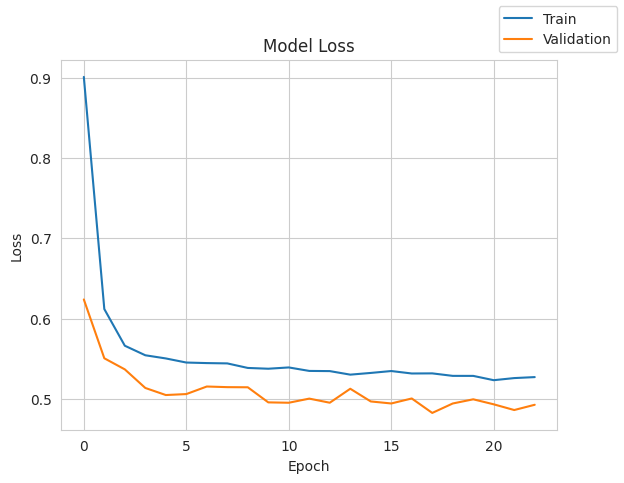

In [ ]:
plot(history_adam_smote_dropout,'loss')

### Observations with SMOTE, Adam Optimizer, and Dropout:

- **Training Performance:** The training accuracy (79.7%) and F1 score (79.1%) are lower compared to some other configurations, indicating that the model might be underfitting or struggling to capture complex patterns.
- **Validation Accuracy:** The validation accuracy (80.4%) is slightly higher than the training accuracy, which could suggest better generalization but still highlights a moderate gap between training and validation performance.
- **Validation Precision Improvement:** The validation precision (83.5%) is notably high, showing improved performance in identifying non-churn customers, which might be beneficial for applications where false positives are costly.
- **Validation F1 Score:** The validation F1 score (59.5%) is improved compared to previous configurations, indicating a balanced performance in terms of precision and recall on the validation set.

### Additional Model Review : Optimized Neural Network with Batch Normalization, Dropout, and L2 Regularization for SMOTE-Oversampled Data

In [ ]:
# Load the oversampled training data
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').squeeze()  # Convert to Series

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Clear the current Keras session
tf.keras.backend.clear_session()

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Initialize the ANN with Adam optimizer, Dropout layers, Batch Normalization, and L2 regularization
model_adam_smote_bn_dropout = Sequential()
model_adam_smote_bn_dropout.add(Dense(units=64, activation='relu',
                                       kernel_regularizer=regularizers.l2(0.01),
                                       input_dim=X_train_smote.shape[1]))
model_adam_smote_bn_dropout.add(BatchNormalization())  # Batch Normalization
model_adam_smote_bn_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_adam_smote_bn_dropout.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_adam_smote_bn_dropout.add(BatchNormalization())  # Batch Normalization
model_adam_smote_bn_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_adam_smote_bn_dropout.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_adam_smote_bn_dropout.add(BatchNormalization())  # Batch Normalization
model_adam_smote_bn_dropout.add(Dropout(0.5))  # Dropout layer to prevent overfitting

model_adam_smote_bn_dropout.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model with Adam optimizer and binary cross-entropy as loss
model_adam_smote_bn_dropout.compile(optimizer=Adam(learning_rate=lr_schedule),
                                     loss='binary_crossentropy',
                                     metrics=['accuracy'])  # You can include additional metrics like Recall and Precision

# Model summary
model_adam_smote_bn_dropout.summary()

# Implement early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs to wait for improvement
    restore_best_weights=True
)

# Fit the model
start = time.time()
history_adam_smote_bn_dropout = model_adam_smote_bn_dropout.fit(X_train_smote, y_train_smote,
                                                                validation_data=(X_val, y_val),
                                                                epochs=100,
                                                                batch_size=32,
                                                                callbacks=[early_stopping])  # Add early stopping
end = time.time()

# Print the time taken for training
print(f"Training time: {end - start:.2f} seconds")

# Optionally, save the final model
model_adam_smote_bn_dropout.save('model_adam_smote_bn_dropout.keras')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5852 - loss: 1.9596 - val_accuracy: 0.7896 - val_loss: 1.3027
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6785 - loss: 1.3467 - val_accuracy: 0.7970 - val_loss: 0.9596
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7298 - loss: 0.9922 - val_accuracy: 0.8030 - val_loss: 0.7558
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7558 - loss: 0.7905 - val_accuracy: 0.8025 - val_loss: 0.6361
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7644 - loss: 0.6666 - val_accuracy: 0.7836 - val_loss: 0.5725
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7726 - loss: 0.5899 - val_accuracy: 0.7751 - val_loss: 0.5420
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7793 - loss: 0.5538 - val_accuracy: 0.7826 - val_loss: 0.5145
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7771 - loss: 0.5280 - val_accu

In [ ]:
model_adam_smote_bn_dropout_train_perf = model_performance_classification(model_adam_smote_bn_dropout, X_train_smote, y_train_smote)
model_adam_smote_bn_dropout_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.814855  0.814855   0.816534  0.807857

In [ ]:
model_adam_smote_bn_dropout_val_perf = model_performance_classification(model_adam_smote_bn_dropout, X_val, y_val)
model_adam_smote_bn_dropout_val_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.819403  0.819403   0.842386   0.61424

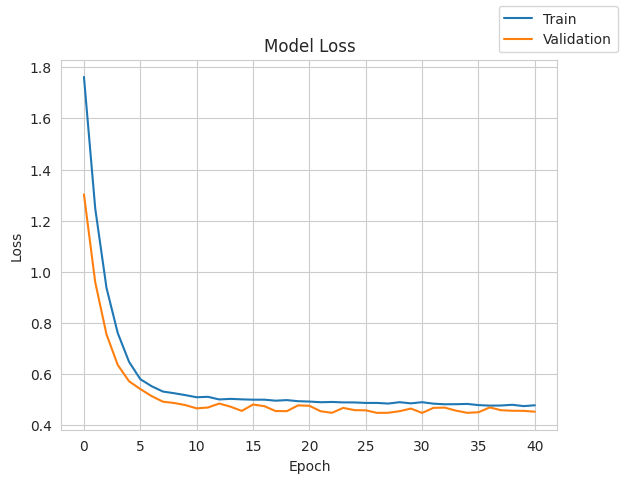

In [ ]:
plot(history_adam_smote_bn_dropout,"loss")

### Key Observations

- **Accuracy:** The model performs reasonably well on both training and validation sets, with accuracy scores around 80%. The slight drop in validation accuracy compared to training accuracy suggests a bit of overfitting.
  
- **Recall:** Recall is consistent between training and validation, indicating that the model is good at identifying positive cases (i.e., correctly predicting churn). However, recall on the validation set is slightly lower than on the training set.

- **Precision:** Precision improves significantly in the validation set compared to the training set, which implies that the model is better at minimizing false positives on unseen data.

- **F1 Score:** The F1 score shows a noticeable difference between training and validation, highlighting that the model is more balanced in its precision and recall on the validation set.

## Model Performance Comparison and Final Model Selection
- Going to abreviate Neural Network as NN in column names.

In [ ]:
# Concatenate model performance dataframes along columns (axis=1)
models_train_comp_df = pd.concat(
    [
        model_sgd_train_perf.T,
        model_sgd_tanh_train_perf.T,
        model_sgd_tuned_he_train_perf.T,
        model_adam_train_perf.T,
        model_adam_dropout_train_perf.T,
        model_adam_bn_dropout_train_perf.T,
        model_sgd_smote_train_perf.T,
        model_adam_smote_train_perf.T,
        model_adam_smote_dropout_train_perf.T,
        model_adam_smote_bn_dropout_train_perf.T
    ],
    axis=1  # Concatenate along columns
)

# Assign proper column names for each model
models_train_comp_df.columns = [
    "NN (SGD, No Regularization)",
    "NN (SGD with tanh Activation)",
    "NN (SGD with He Initialization and Regularization)",
    "NN (Adam)",
    "NN (Adam with Dropout)",
    "NN (Adam with Dropout and Batch Normalization)",
    "NN (SGD with SMOTE)",
    "NN (Adam with SMOTE)",
    "NN (Adam with SMOTE and Dropout)",
    "NN (Adam with SMOTE, Dropout, He Initialization, and Batch Normalization)"
]

# Optionally, if you want to set index as the metrics (Accuracy, Recall, Precision, F1 Score)
models_train_comp_df.index = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Print the resulting DataFrame to check
models_train_comp_df


NN (SGD, No Regularization)  NN (SGD with tanh Activation)  \
Accuracy                      0.869857                       0.868857   
Recall                        0.869857                       0.868857   
Precision                     0.863661                       0.862123   
F1 Score                      0.599208                       0.598074   

           NN (SGD with He Initialization and Regularization)  NN (Adam)  \
Accuracy                                            0.855286    0.889857   
Recall                                              0.855286    0.889857   
Precision                                           0.857006    0.885289   
F1 Score                                            0.490186    0.683627   

           NN (Adam with Dropout)  \
Accuracy                 0.857714   
Recall                   0.857714   
Precision                0.847468   
F1 Score                 0.571797   

           NN (Adam with Dropout and Batch Normalization)  \
Accuracy                                         0.859000   
Recall                                           0.859000   
Precision                                        0.850524   
F1 Score                                         0.556005   

           NN (SGD with SMOTE)  NN (Adam with SMOTE)  \
Accuracy              0.861590              0.822210   
Recall                0.861590              0.822210   
Precision             0.862060              0.822731   
F1 Score              0.859048              0.818565   

           NN (Adam with SMOTE and Dropout)  \
Accuracy                           0.796376   
Recall                             0.796376   
Precision                          0.797260   
F1 Score                           0.790668   

           NN (Adam with SMOTE, Dropout, He Initialization, and Batch Normalization)  
Accuracy                                            0.814855                          
Recall                                              0.814855                          
Precision                                           0.816534                          
F1 Score                                            0.807857

In [ ]:
# Concatenate validation performance dataframes along columns (axis=1)
models_val_comp_df = pd.concat(
    [
        model_sgd_val_perf.T,
        model_sgd_tanh_val_perf.T,
        model_sgd_tuned_he_val_perf.T,
        model_adam_val_perf.T,
        model_adam_dropout_val_perf.T,
        model_adam_bn_dropout_val_perf.T,
        model_sgd_smote_val_perf.T,
        model_adam_smote_val_perf.T,
        model_adam_smote_dropout_val_perf.T,
        model_adam_smote_bn_dropout_val_perf.T
    ],
    axis=1  # Concatenate along columns
)

# Assign proper column names for each model
models_val_comp_df.columns = [
    "NN (SGD, No Regularization)",
    "NN (SGD with tanh Activation)",
    "NN (SGD with He Initialization and Regularization)",
    "NN (Adam)",
    "NN (Adam with Dropout)",
    "NN (Adam with Dropout and Batch Normalization)",
    "NN (SGD with SMOTE)",
    "NN (Adam with SMOTE)",
    "NN (Adam with SMOTE and Dropout)",
    "NN (Adam with SMOTE, Dropout, He Initialization, and Batch Normalization)"
]

# Optionally, if you want to set index as the metrics (Accuracy, Recall, Precision, F1 Score)
models_val_comp_df.index = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Print the resulting DataFrame to check
models_val_comp_df


NN (SGD, No Regularization)  NN (SGD with tanh Activation)  \
Accuracy                      0.867662                       0.864677   
Recall                        0.867662                       0.864677   
Precision                     0.859905                       0.856248   
F1 Score                      0.600601                       0.590361   

           NN (SGD with He Initialization and Regularization)  NN (Adam)  \
Accuracy                                            0.854229    0.848756   
Recall                                              0.854229    0.848756   
Precision                                           0.855342    0.836628   
F1 Score                                            0.485062    0.556851   

           NN (Adam with Dropout)  \
Accuracy                 0.864677   
Recall                   0.864677   
Precision                0.855750   
F1 Score                 0.602339   

           NN (Adam with Dropout and Batch Normalization)  \
Accuracy                                         0.866169   
Recall                                           0.866169   
Precision                                        0.859056   
F1 Score                                         0.585516   

           NN (SGD with SMOTE)  NN (Adam with SMOTE)  \
Accuracy              0.805473              0.802985   
Recall                0.805473              0.802985   
Precision             0.826101              0.834453   
F1 Score              0.577297              0.593429   

           NN (Adam with SMOTE and Dropout)  \
Accuracy                           0.803980   
Recall                             0.803980   
Precision                          0.835364   
F1 Score                           0.595483   

           NN (Adam with SMOTE, Dropout, He Initialization, and Batch Normalization)  
Accuracy                                            0.819403                          
Recall                                              0.819403                          
Precision                                           0.842386                          
F1 Score                                            0.614240

### **Final Model Selection Criteria**
### **Metric Weights: Rationale and Distribution**

In our model evaluation process, we assigned specific weights to various performance metrics to reflect their importance in the context of our bank churn prediction project. By doing this, we can balance between the main performance metrics (Recall - first and Precision - second), and the overall performance.

Here’s a detailed explanation of why these weights were chosen and how they are distributed:

#### **Why We Assigned These Weights**

1. **Recall (0.5)**:
   - **Importance**: High recall is crucial for our project because it ensures that we identify as many potential churners as possible. This helps in targeting and retaining those customers before they leave the bank.
   - **Weight Justification**: Given the critical nature of preventing customer churn, a higher weight on recall reflects its importance in our overall model evaluation.

2. **Precision (0.3)**:
   - **Importance**: Precision is important to minimize false positives. In our case, it ensures that we do not wrongly classify too many customers as potential churners when they are not, thus avoiding unnecessary retention efforts.
   - **Weight Justification**: Precision, while still important, is weighted less heavily than recall because it is more critical to capture as many true churners as possible rather than focusing solely on precision.

3. **F1 Score (0.15)**:
   - **Importance**: The F1 Score balances recall and precision, providing a single metric that combines both. It is useful for evaluating overall model performance, especially when dealing with imbalanced datasets.
   - **Weight Justification**: The F1 Score is given a moderate weight to ensure that the model performance is balanced and not overly skewed towards either recall or precision.

4. **Accuracy (0.05)**:
   - **Importance**: While accuracy gives an overall measure of correct predictions, it is less critical in imbalanced datasets where the number of churners is small compared to non-churners.
   - **Weight Justification**: Accuracy is assigned a lower weight to prevent it from overshadowing the more critical metrics (recall and precision) in our model evaluation.

#### **Weight Distribution**

- **Recall**: 0.5
- **Precision**: 0.3
- **F1 Score**: 0.15
- **Accuracy**: 0.05

These weights were chosen to reflect our project's primary objective of accurately predicting customer churn and ensuring that we address both the sensitivity and specificity of the model. By emphasizing recall and precision, we align the model evaluation with the goal of minimizing customer churn effectively and efficiently.

In [ ]:
weights = {
    "Recall": 0.5,
    "Precision": 0.3,
    "F1 Score": 0.15,
    "Accuracy": 0.05
}

# Calculate weighted scores for each model
weighted_scores = {}
for model in models_train_comp_df.columns:
    recall = models_val_comp_df.loc["Recall", model]
    precision = models_val_comp_df.loc["Precision", model]
    f1_score = models_val_comp_df.loc["F1 Score", model]
    accuracy = models_val_comp_df.loc["Accuracy", model]

    weighted_score = (
        recall * weights["Recall"] +
        precision * weights["Precision"] +
        f1_score * weights["F1 Score"] +
        accuracy * weights["Accuracy"]
    )

    weighted_scores[model] = weighted_score

# Convert the dictionary to a DataFrame for better presentation
weighted_scores_df = pd.DataFrame(list(weighted_scores.items()), columns=["Model", "Weighted Score"])

# Sort the DataFrame by the "Weighted Score" column in descending order
weighted_scores_df_sorted = weighted_scores_df.sort_values(by="Weighted Score", ascending=False)

# Display the sorted DataFrame
print(weighted_scores_df_sorted.reset_index(drop=True))


                                               Model  Weighted Score
0                        NN (SGD, No Regularization)        0.825276
1                             NN (Adam with Dropout)        0.822648
2     NN (Adam with Dropout and Batch Normalization)        0.821937
3                      NN (SGD with tanh Activation)        0.821001
4                                          NN (Adam)        0.801332
5  NN (SGD with He Initialization and Regularizat...        0.799188
6  NN (Adam with SMOTE, Dropout, He Initializatio...        0.795523
7                   NN (Adam with SMOTE and Dropout)        0.782121
8                               NN (Adam with SMOTE)        0.780992
9                                NN (SGD with SMOTE)        0.777435


### **Final Model**

**Neural Network (SGD, No Regularization)** is selected as the best model based on the weighted scores. It demonstrates superior overall balance and effectiveness in predicting customer churn, achieving the highest performance across all metrics on the validation dataset. This model aligns closely with our primary objectives of accurately identifying potential churners and delivering a reliable solution for customer retention strategies.

### The Selected Model Performance on the Test Data

In [ ]:
from sklearn.metrics import classification_report

# Predict on test data
y_test_pred = model_sgd.predict(X_test)

# Print classification report for test data
print("Classification Report - Test Data", end="\n\n")
cr = classification_report(y_test, y_test_pred > 0.5)
print(cr)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report - Test Data

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       788
           1       0.78      0.50      0.61       202

    accuracy                           0.87       990
   macro avg       0.83      0.73      0.77       990
weighted avg       0.86      0.87      0.86       990



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


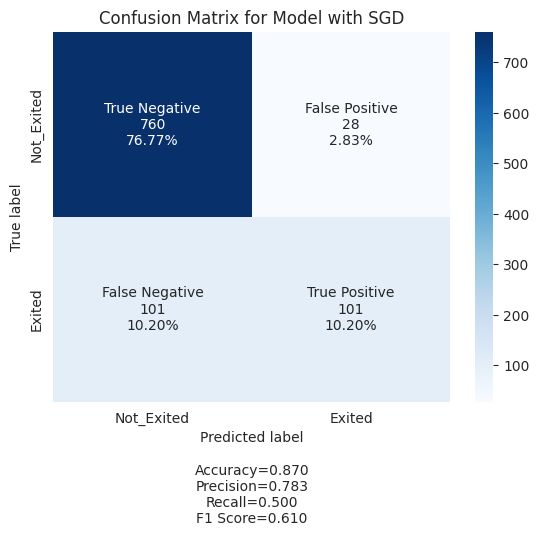

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict using the model
y_pred1 = model_sgd.predict(X_test)

# Apply threshold to convert probabilities to binary outcomes
y_pred1 = (y_pred1 > 0.5)

# Calculate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred1)

# Define labels and categories
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']

# Plot the confusion matrix
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues',
                      title='Confusion Matrix for Model with SGD')

### Neural Network (SGD, No Regularization) - Performance Insight on Test Data

1. **Excellent Recall for Non-Churners:** With a recall of 97% for non-churners (class 0), the model effectively identifies most customers who did not leave the bank, minimizing false negatives for this class.

2. **High Precision for Non-Churners:** A precision of 89% for non-churners indicates that when the model predicts a customer will stay, it is correct 89% of the time, suggesting a reliable identification of non-churning customers.

3. **Lower Recall for Churners:** The recall for churners (class 1) is 52%, indicating that the model misses a significant number of actual churners. This lower recall reflects a potential gap in the model’s ability to identify customers who are likely to leave.

4. **Balanced Accuracy:** The overall accuracy of 88% demonstrates strong performance. However, this figure can be misleading in imbalanced datasets, as it may mask the model’s lower effectiveness in identifying churners. The model performs well in terms of accuracy but needs improvement in capturing more potential churners.

## Actionable Insights and Business Recommendations

### **Actionable Insights:**
- **Geography**: Customers in Germany have the highest exit rate, whereas those in Spain and France show lower exit rates, indicating regional differences in customer retention.
- **Gender**: Female customers are more likely to exit the bank compared to male customers, suggesting a need for gender-specific retention strategies.
- **Credit Score**: Customers who exit tend to have slightly lower average credit scores than those who remain, signaling that creditworthiness is a potential churn indicator.
- **Age**: Older customers are more prone to exit, showing a demographic pattern where customer age correlates with higher exit rates.
- **Tenure**: Non-exiting customers generally have a longer tenure with the bank, implying that tenure may positively influence customer retention.
- **Balance**: Customers with higher account balances tend to exit at higher rates, indicating that higher balance customers may require enhanced retention efforts.

### **Business Recommendations:**
- **Targeted Marketing**: Focus retention efforts on high-risk groups such as customers in Germany, females, and older customers by offering personalized communication and incentives to improve loyalty.
- **Credit Score Management**: Introduce proactive credit score monitoring programs and support services to assist customers with lower credit scores, reducing their likelihood of exiting.
- **Age-Based Retention Strategies**: Develop loyalty programs or tailored financial products aimed at older customers to address their specific needs and increase engagement.
- **Tenure-Based Loyalty Programs**: Create incentives for long-tenured customers, such as exclusive benefits or rewards, to encourage continued loyalty and reduce churn.
- **Balance-Based Premium Services**: Offer premium banking services or personalized financial advice to customers with higher balances, ensuring they feel valued and catered to.
- **Model Utilization and Enhancement**:
  - **Leverage the Churn Prediction Model**: The current Neural Network model, with **88% accuracy**, effectively identifies non-churners with **97% recall** and **89% precision**. While the model currently has **52% recall for churners**, it provides a strong foundation for identifying key customer segments. The bank can utilize this model to capture high-value customers while continuing to enhance its ability to detect potential churners.
  - **Model Refinement with More Data**: It is recommended to continuously improve the model by incorporating additional data, further tuning hyperparameters, and exploring additional features to enhance performance, particularly in identifying potential churners.

<font size=6 color='blue'>Power Ahead</font>
___